<a href="https://colab.research.google.com/github/PatWoo23/Data-Analysis/blob/main/DataExploration_Salesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation Part 2. and Data

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [ ]:
#load the excel and the first row is column names
df = pd.read_csv('/Users/pat/Desktop/Business Analytics/MIS587 BI/Project/sales.csv', header=0)
print(df.head())

/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/2972068833.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/pat/Desktop/Business Analytics/MIS587 BI/Project/sales.csv', header=0)


    order_id  order_date    status   item_id                  sku  \
0  100354678  2020-10-01  received  574772.0   oasis_Oasis-064-36   
1  100354678  2020-10-01  received  574774.0      Fantastic_FT-48   
2  100354680  2020-10-01  complete  574777.0      mdeal_DMC-610-8   
3  100354680  2020-10-01  complete  574779.0   oasis_Oasis-061-36   
4  100367357  2020-11-13  received  595185.0  MEFNAR59C38B6CA08CD   

   qty_ordered  price   value  discount_amount   total  ...          SSN  \
0         21.0   89.9  1798.0              0.0  1798.0  ...  627-31-5251   
1         11.0   19.0   190.0              0.0   190.0  ...  627-31-5251   
2          9.0  149.9  1199.2              0.0  1199.2  ...  627-31-5251   
3          9.0   79.9   639.2              0.0   639.2  ...  627-31-5251   
4          2.0   99.9    99.9              0.0    99.9  ...  627-31-5251   

     Phone No.  Place Name  County    City State    Zip Region User Name  \
0  405-959-1129     Vinson  Harmon  Vinson    OK  73

In [ ]:
#print all column names
print(df.columns)


Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')


In [ ]:
#check data types
print(df.dtypes)


order_id             object
order_date           object
status               object
item_id             float64
sku                  object
qty_ordered         float64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id             float64
year                  int64
month                object
ref_num               int64
Name Prefix          object
First Name           object
Middle Initial       object
Last Name            object
Gender               object
age                 float64
full_name            object
E Mail               object
Customer Since       object
SSN                  object
Phone No.            object
Place Name           object
County               object
City                 object
State                object
Zip                   int64
Region               object
User Name            object
Discount_Percent    

In [ ]:
#check missing values
print(df.isnull().sum())

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64


In [ ]:
#identify rows with different values on 'price', 'value'. Print the affected rows with order_id, price, value, qty_ordered, discount_amount, total_amount
# Filter rows where 'price' and 'value' are different
df_different = df[df['price'] != df['value']]

# Print the affected rows with specified columns
print(df_different[['order_id', 'price', 'value', 'discount_amount', 'qty_ordered', 'total']])



         order_id  price   value  discount_amount  qty_ordered   total
0       100354678   89.9  1798.0              0.0         21.0  1798.0
1       100354678   19.0   190.0              0.0         11.0   190.0
2       100354680  149.9  1199.2              0.0          9.0  1199.2
3       100354680   79.9   639.2              0.0          9.0   639.2
10      100356116  549.9     0.0              0.0          1.0     0.0
...           ...    ...     ...              ...          ...     ...
286299  100562226  130.0   650.0              0.0          6.0   650.0
286301  100562231   69.9   489.3              0.0          8.0   489.3
286361  100562309   50.0   100.0              0.0          3.0   100.0
286362  100562337   50.0   100.0              0.0          3.0   100.0
286371  100562319   35.0    70.0              0.0          3.0    70.0

[101273 rows x 6 columns]


In [ ]:
#convert to datetime
df['Customer Since'] = pd.to_datetime(df3['Customer Since'])
df['order_date'] = pd.to_datetime(df3['order_date'])
#print data types for these two columns
print(df[['Customer Since', 'order_date']].dtypes)
print(df[['Customer Since', 'order_date']].head())


Customer Since    datetime64[ns]
order_date        datetime64[ns]
dtype: object
  Customer Since order_date
0     1981-02-04 2020-12-24
1     1981-02-04 2020-12-24
2     2010-06-27 2020-10-24
3     2010-06-27 2020-10-25
4     2003-07-20 2020-11-07


## Understanding the Summary Statisics

In [ ]:
#check the summary descriptive of numeric values only
print(df.describe())

                          order_date        item_id    qty_ordered  \
count                         134820  286392.000000  286392.000000   
mean   2021-03-06 22:53:31.321762048  741664.902131       3.011296   
min              2020-10-01 00:00:00  574769.000000       1.000000   
25%              2020-12-24 00:00:00  659684.500000       2.000000   
50%              2021-02-20 00:00:00  742309.000000       2.000000   
75%              2021-05-03 00:00:00  826124.250000       3.000000   
max              2021-09-30 00:00:00  905208.000000     501.000000   
std                              NaN   95746.031827       4.573837   

               price          value  discount_amount          total  \
count  286392.000000  286392.000000    286392.000000  286392.000000   
mean      851.385253     885.879934        70.039427     815.840507   
min         0.000000       0.000000         0.000000       0.000000   
25%        49.900000      49.900000         0.000000      49.900000   
50%       119.

In [ ]:
#show the distinct

In [ ]:
#check distinct values for 'Category', 'Reference Number', 'User Name', 'Status', 'Payment Method'
print(df['category'].nunique())
print(df['ref_num'].nunique())
print(df['User Name'].nunique())
print(df['status'].nunique())
print(df['payment_method'].nunique())


15
62065
64006
13
13


## Understanding the Payment Method

In [ ]:
#print distinct 'payment_method' values
print(df['payment_method'].unique())

['cod' 'Payaxis' 'Easypay' 'jazzwallet' 'Easypay_MA' 'jazzvoucher'
 'easypay_voucher' 'customercredit' 'bankalfalah' 'apg' 'mcblite'
 'cashatdoorstep' 'financesettlement']


## Understanding the Status

In [ ]:
print(df['status'].unique())

['received' 'complete' 'order_refunded' 'canceled' 'refund' 'cod' 'paid'
 'processing' 'closed' 'pending' 'pending_paypal' 'payment_review'
 'holded']


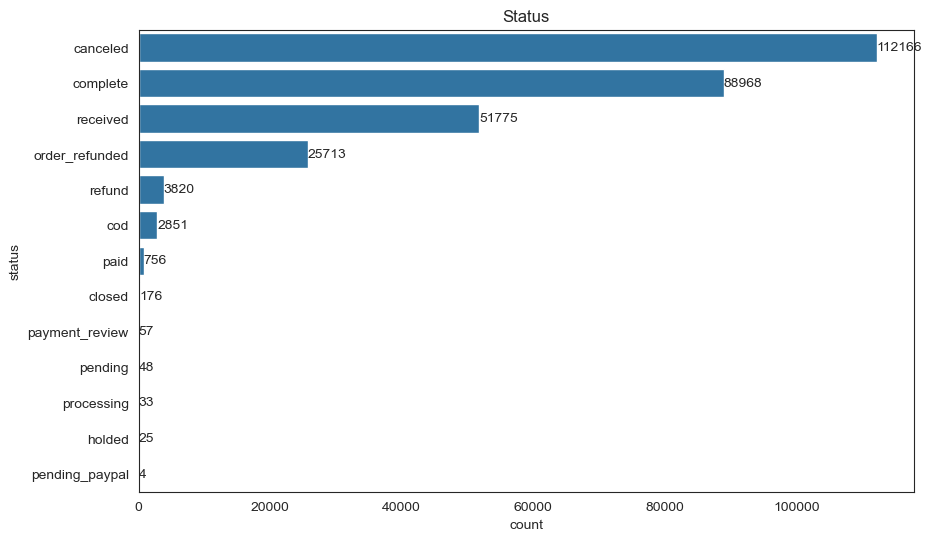

In [ ]:
# Set the style to 'white' to remove the grid
sns.set_style('white')
# Sort 'status' in descending order of frequency
status_order = df['status'].value_counts().index

# Plot the bar chart for 'status'
plt.figure(figsize=(10, 6))
plot = sns.countplot(y='status', data=df, order=status_order)
plt.title('Status')

# Add labels to each bar
for p in plot.patches:
    width = p.get_width()
    plt.text(width,
             p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width),
             ha = 'left',
             va = 'center')

plt.show()

## Group Order Status

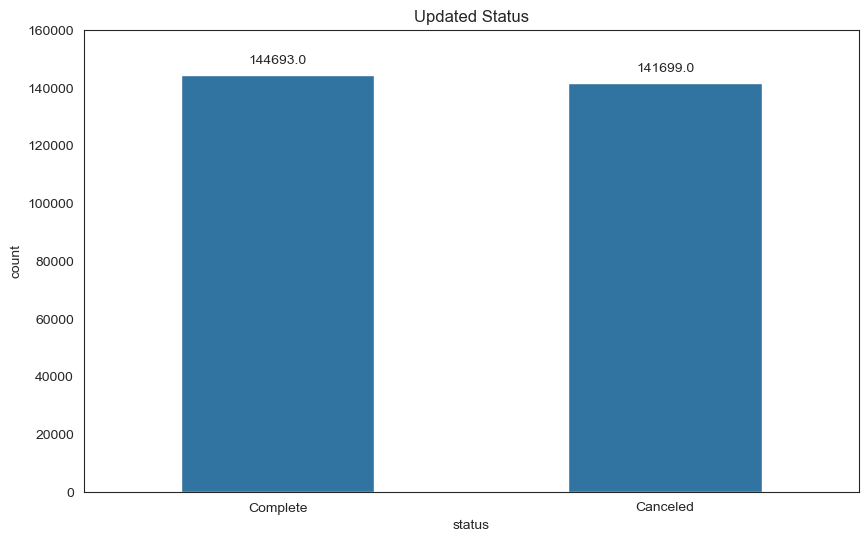

In [ ]:
# copy the df to df2
# Status include ['received' 'complete' 'order_refunded' 'canceled' 'refund' 'cod' 'paid'
# 'processing' 'closed' 'pending' 'pending_paypal' 'payment_review'
# 'holded']
# Regarding status, group 'complete', group 'canceled', 'refund', 'order_refunded' and called 'Canceled'. Then the rest as 'Complete'
df2 = df.copy()
df2['status'] = df2['status'].replace(['canceled', 'order_refunded', 'refund'], 'Canceled')
df2['status'] = df2['status'].replace(['received', 'complete', 'cod', 'paid', 'processing', 'closed', 'pending', 'pending_paypal', 'payment_review', 'holded'], 'Complete')
#show barchart for status in df2
#add chart title as 'Updated Status'
#add data labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df2, x='status', width=0.5)
plt.title('Updated Status')
plt.ylim(0, 160000)
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


## Identify Outliers

In [ ]:
# Filter when the status is 'complete'
df_complete = df2[df2['status'] == 'Complete']


In [ ]:
# find out the datatype 'order_id', 'price', 'value', 'discount_amount', 'qty_ordered', 'total'
print(df_complete[['order_id', 'price', 'value', 'discount_amount', 'qty_ordered', 'total']].dtypes)


order_id            object
price              float64
value              float64
discount_amount    float64
qty_ordered        float64
total              float64
dtype: object


In [ ]:
#remove the ".0" of 'qty_ordered'
df_complete['qty_ordered'] = df_complete['qty_ordered'].astype(int)
print(df_complete['qty_ordered'].head())

0    21
1    11
2     9
3     9
4     2
Name: qty_ordered, dtype: int64


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/405974607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['qty_ordered'] = df_complete['qty_ordered'].astype(int)


In [ ]:
# find out the datatype 'order_id', 'price', 'value', 'discount_amount', 'qty_ordered', 'total'
print(df_complete[['order_id', 'price', 'value', 'discount_amount', 'qty_ordered', 'total']].dtypes)


order_id            object
price              float64
value              float64
discount_amount    float64
qty_ordered          int64
total              float64
dtype: object


In [ ]:
# Filter df2 for rows where 'price'*'qty_ordered' and 'value' are different,
df_different = df_complete[df_complete['price'] * df_complete['qty_ordered'] != df_complete['value']]
# Print the affected rows with specified columns
print(df_different[['order_id', 'price', 'value', 'discount_amount', 'qty_ordered', 'total']])



         order_id   price   value  discount_amount  qty_ordered   total
0       100354678    89.9  1798.0              0.0           21  1798.0
1       100354678    19.0   190.0              0.0           11   190.0
2       100354680   149.9  1199.2              0.0            9  1199.2
3       100354680    79.9   639.2              0.0            9   639.2
4       100367357    99.9    99.9              0.0            2    99.9
...           ...     ...     ...              ...          ...     ...
286387  100562365  4419.9  4419.9              0.0            2  4419.9
286388  100562376    39.9    39.9              0.0            2    39.9
286389  100562383    40.0    40.0              0.0            2    40.0
286390  100562384    49.9    49.9              0.0            2    49.9
286391  100562386  3559.9  3559.9              0.0            2  3559.9

[144068 rows x 6 columns]


## Revising the qty_ordered

In [ ]:
#For rows  where 'price'*'qty_ordered' and 'value' are different, revise the 'qty_ordered' to its current value - 1
df_complete['qty_ordered'] = np.where(df_complete['price'] * df_complete['qty_ordered'] != df_complete['value'], df_complete['qty_ordered'] - 1, df_complete['qty_ordered'])


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/2384464138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['qty_ordered'] = np.where(df_complete['price'] * df_complete['qty_ordered'] != df_complete['value'], df_complete['qty_ordered'] - 1, df_complete['qty_ordered'])


In [ ]:
#create a new column on df_complete called 'Calculated Sum of Sales' and it is derived from "price"*"qty_ordered"
df_complete['Calculated Sum of Sales'] = df_complete['price'] * df_complete['qty_ordered']
print(df_complete[['price', 'qty_ordered', 'Calculated Sum of Sales']].head())

   price  qty_ordered  Calculated Sum of Sales
0   89.9           20                   1798.0
1   19.0           10                    190.0
2  149.9            8                   1199.2
3   79.9            8                    639.2
4   99.9            1                     99.9


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/1695634363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Calculated Sum of Sales'] = df_complete['price'] * df_complete['qty_ordered']


In [ ]:
#datatype of 'Calculated Sum of Sales'
print(df_complete['Calculated Sum of Sales'].dtypes)


float64


In [ ]:
# This is more applicable if your data might have string representations or errors in data entry
df_complete['Calculated Sum of Sales'] = df_complete['Calculated Sum of Sales'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_complete['value'] = df_complete['value'].apply(lambda x: x.strip() if isinstance(x, str) else x)


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/2891980092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Calculated Sum of Sales'] = df_complete['Calculated Sum of Sales'].apply(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/2891980092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['value'] = df_complete['value'].apply(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
tolerance = 0.01  # Set a suitable tolerance level
df_different = df_complete[abs(df_complete['Calculated Sum of Sales'] - df_complete['value']) > tolerance]


In [ ]:
#set the data format for ['Calculated Sum of Sales'] and ['value'] to 2 decimal places and remove any spaces in front of the values
df_complete['Calculated Sum of Sales'] = df_complete['Calculated Sum of Sales'].apply(lambda x: round(x, 2))
df_complete['value'] = df_complete['value'].apply(lambda x: round(x, 2))
df_complete['Calculated Sum of Sales'] = df_complete['Calculated Sum of Sales'].apply(lambda x: str(x).strip())
df_complete['value'] = df_complete['value'].apply(lambda x: str(x).strip())
print (df_complete[['Calculated Sum of Sales', 'value']].head())

/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/3242315496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Calculated Sum of Sales'] = df_complete['Calculated Sum of Sales'].apply(lambda x: round(x, 2))
/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/3242315496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['value'] = df_complete['value'].apply(lambda x: round(x, 2))
/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/324231549

  Calculated Sum of Sales   value
0                  1798.0  1798.0
1                   190.0   190.0
2                  1199.2  1199.2
3                   639.2   639.2
4                    99.9    99.9


## 0.01 problems

In [ ]:
# Convert 'Calculated Sum of Sales' and 'value' to numeric types (float)
df_complete['Calculated Sum of Sales'] = pd.to_numeric(df_complete['Calculated Sum of Sales'], errors='coerce')
df_complete['value'] = pd.to_numeric(df_complete['value'], errors='coerce')

# Set a tolerance for comparison
tolerance = 0.01

# Find rows where the absolute difference between 'Calculated Sum of Sales' and 'value' exceeds the tolerance
df_different = df_complete[abs(df_complete['Calculated Sum of Sales'] - df_complete['value']) > tolerance]

# Print the rows with significant differences
print(df_different[['order_id', 'price', 'value', 'Calculated Sum of Sales', 'discount_amount', 'qty_ordered', 'total']])


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/4020724048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Calculated Sum of Sales'] = pd.to_numeric(df_complete['Calculated Sum of Sales'], errors='coerce')


         order_id   price   value  Calculated Sum of Sales  discount_amount  \
43815   100382883  69.275  207.82                   207.83         66.60717   
247110  100514652   8.925   26.77                    26.78          0.00000   
247377  100519827  21.165  190.49                   190.48          0.00000   
247379  100519827  21.165  190.49                   190.48          0.00000   
247380  100519827  21.165  190.49                   190.48          0.00000   
247381  100519827  21.165  190.49                   190.48          0.00000   
274688  100545482  21.165  190.49                   190.48          0.00000   

        qty_ordered      total  
43815             3  141.21783  
247110            3   26.77500  
247377            9  190.48500  
247379            9  190.48500  
247380            9  190.48500  
247381            9  190.48500  
274688            9  190.48500  


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/4020724048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['value'] = pd.to_numeric(df_complete['value'], errors='coerce')


## Understanding the Category

/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/3220511307.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot.text(category_counts[i], i, category_counts[i], color='black', ha="left")


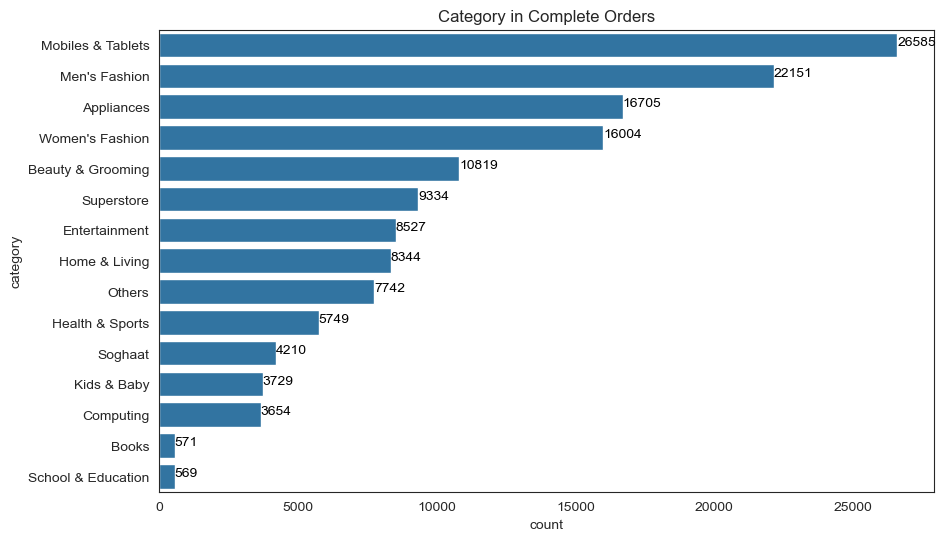

In [ ]:
plt.figure(figsize=(10, 6))

# Get the counts of each category for 'Complete' orders
category_counts = df_complete[df_complete['status'] == 'Complete']['category'].value_counts()

# Create the countplot with sorted categories
plot = sns.countplot(y='category', data=df_complete[df_complete['status'] == 'Complete'], order=category_counts.index)

# Add data labels
for i in range(category_counts.shape[0]):
    plot.text(category_counts[i], i, category_counts[i], color='black', ha="left")

plt.title('Category in Complete Orders')
plt.show()

#Investigate on 'Superstore' category because this is an unusal category in the retail sales.

In [ ]:
#find out the distinct 'sku' of 'Superstore'
print(df_complete[df_complete['category'] == 'Superstore']['sku'].nunique())


1566


In [ ]:
#print the top 10 'sku' of 'Superstore' with the highest 'qty_ordered'
print(df_complete[df_complete['category'] == 'Superstore'].groupby('sku')['qty_ordered'].sum().sort_values(ascending=False).head(10))


sku
KNO59D64DAF36939    4304
VIT5ABCCF7FDF973    3401
KNO59D64DAC18B6C    2984
ROO5AE983F167CA8    1296
VIT5AC4A6F2D60CC    1000
ROO5AE983F2751EA     925
VIT5A9D40C2CB36F     855
RAF59D64DB567970     834
VIT5AC4A6E9F0554     786
ROO5AE983F1E6F05     690
Name: qty_ordered, dtype: int64


Due to the limitation of this dataset, we are unable to find out what are the exact items with descptions under the 'Superstore.'

/Users/pat/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


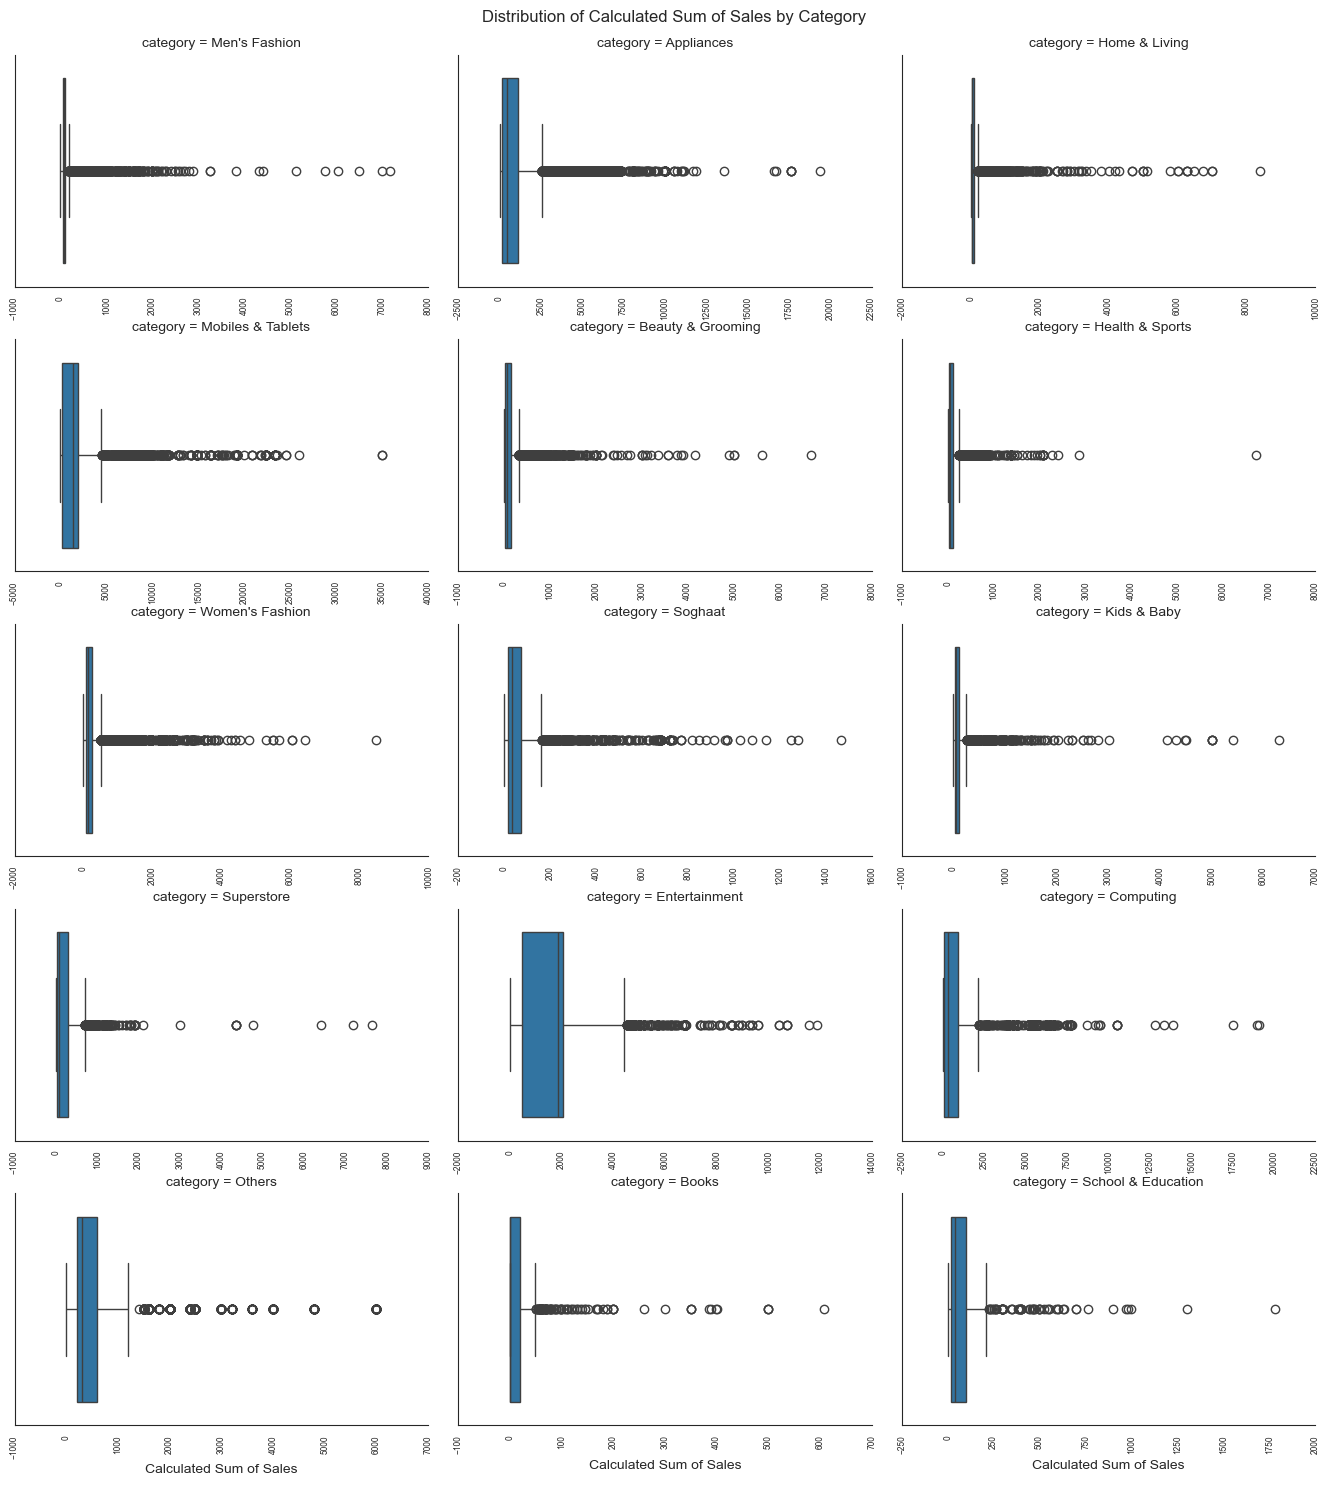

In [ ]:
# Filter df_complete for rows where status is 'Complete'
df_filtered = df_complete[df_complete['status'] == 'Complete']

# Create a FacetGrid that makes a separate subplot for each unique value of 'category'
# Set the aspect ratio to 1.5 to make the x-axis 0.5 times longer
g = sns.FacetGrid(df_filtered, col='category', col_wrap=3, sharex=False, aspect=1.5)

# Map sns.boxplot to each subplot
g.map(sns.boxplot, 'Calculated Sum of Sales')

# Rotate x-axis labels for better visibility and set their size to 6
g.set_xticklabels(rotation=90, size=6)

# Add a main title for the entire plot
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Calculated Sum of Sales by Category")

plt.show()

In [ ]:
#summary statistics of 'Calculated Sum of Sales' of each category for df_filtered = df_complete[df_complete['status'] == 'Complete']
print(df_filtered.groupby('category')['Calculated Sum of Sales'].describe())


                      count         mean          std  min     25%      50%  \
category                                                                      
Appliances          16705.0   970.800831  1518.779138  0.0  131.00   473.40   
Beauty & Grooming   10819.0   149.107265   278.623990  0.0   30.00    63.80   
Books                 571.0    26.374781    69.968817  0.0    0.00     0.00   
Computing            3654.0   950.342094  1698.363989  0.0   76.75   284.15   
Entertainment        8527.0  1727.865891  1394.732882  0.0  465.90  1875.00   
Health & Sports      5749.0   114.020085   219.857663  0.0   21.00    45.00   
Home & Living        8344.0   129.542917   371.823521  0.0   25.00    47.10   
Kids & Baby          3729.0   138.747890   348.975994  0.0   24.70    51.98   
Men's Fashion       22151.0   113.356586   209.395121  0.0   44.90    69.90   
Mobiles & Tablets   26585.0  1680.330768  2275.306424  0.0  149.90  1369.80   
Others               7742.0   611.585275   827.92811

In [ ]:
#export the summary descriptive to an excel file in this path: /Users/pat/Desktop/Business Analytics/MIS587 BI/Project/Working/exported
df_filtered.groupby('category')['Calculated Sum of Sales'].describe().to_excel('/Users/pat/Desktop/Business Analytics/MIS587 BI/Project/Working/exported/summary_stats.xlsx')



In [ ]:
# Calculate the sum of sales for each category
df_filtered['calculated_sum_of_sales'] = df_filtered['price'] * df_filtered['qty_ordered']

# Group by 'category' and calculate the IQR, lower bound, and upper bound
outlier_info = df_filtered.groupby('category')['calculated_sum_of_sales'].describe(percentiles=[0.25, 0.75])
outlier_info['IQR'] = outlier_info['75%'] - outlier_info['25%']
outlier_info['lower_bound'] = outlier_info['25%'] - 1.5 * outlier_info['IQR']
outlier_info['upper_bound'] = outlier_info['75%'] + 1.5 * outlier_info['IQR']

# Calculate the number of outliers for each category
outlier_counts = df_filtered.groupby('category').apply(lambda group: ((group['calculated_sum_of_sales'] < outlier_info.loc[group.name, 'lower_bound']) | (group['calculated_sum_of_sales'] > outlier_info.loc[group.name, 'upper_bound'])).sum())
outlier_info['num_outliers'] = outlier_counts

# Calculate the percentage of outliers for each category
outlier_info['percentage_outliers'] = outlier_info['num_outliers'] / outlier_info['count'] * 100

# Print the table
print(outlier_info[['lower_bound', 'upper_bound', 'num_outliers', 'percentage_outliers']])

                    lower_bound  upper_bound  num_outliers  \
category                                                     
Appliances            -1322.200     2553.000          1754   
Beauty & Grooming      -142.350      317.250          1351   
Books                   -29.925       49.875            93   
Computing             -1158.125     2134.875           416   
Entertainment         -1925.100     4450.900           382   
Health & Sports        -112.350      243.250           598   
Home & Living           -87.200      212.000           932   
Kids & Baby            -110.750      250.450           407   
Men's Fashion           -43.750      192.650          2388   
Mobiles & Tablets     -2470.900     4517.900          1919   
Others                 -400.000     1200.000           870   
School & Education      -99.900      219.300            61   
Soghaat                 -68.500      161.100           479   
Superstore             -379.100      706.500           759   
Women's 

/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/1208787743.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outlier_counts = df_filtered.groupby('category').apply(lambda group: ((group['calculated_sum_of_sales'] < outlier_info.loc[group.name, 'lower_bound']) | (group['calculated_sum_of_sales'] > outlier_info.loc[group.name, 'upper_bound'])).sum())


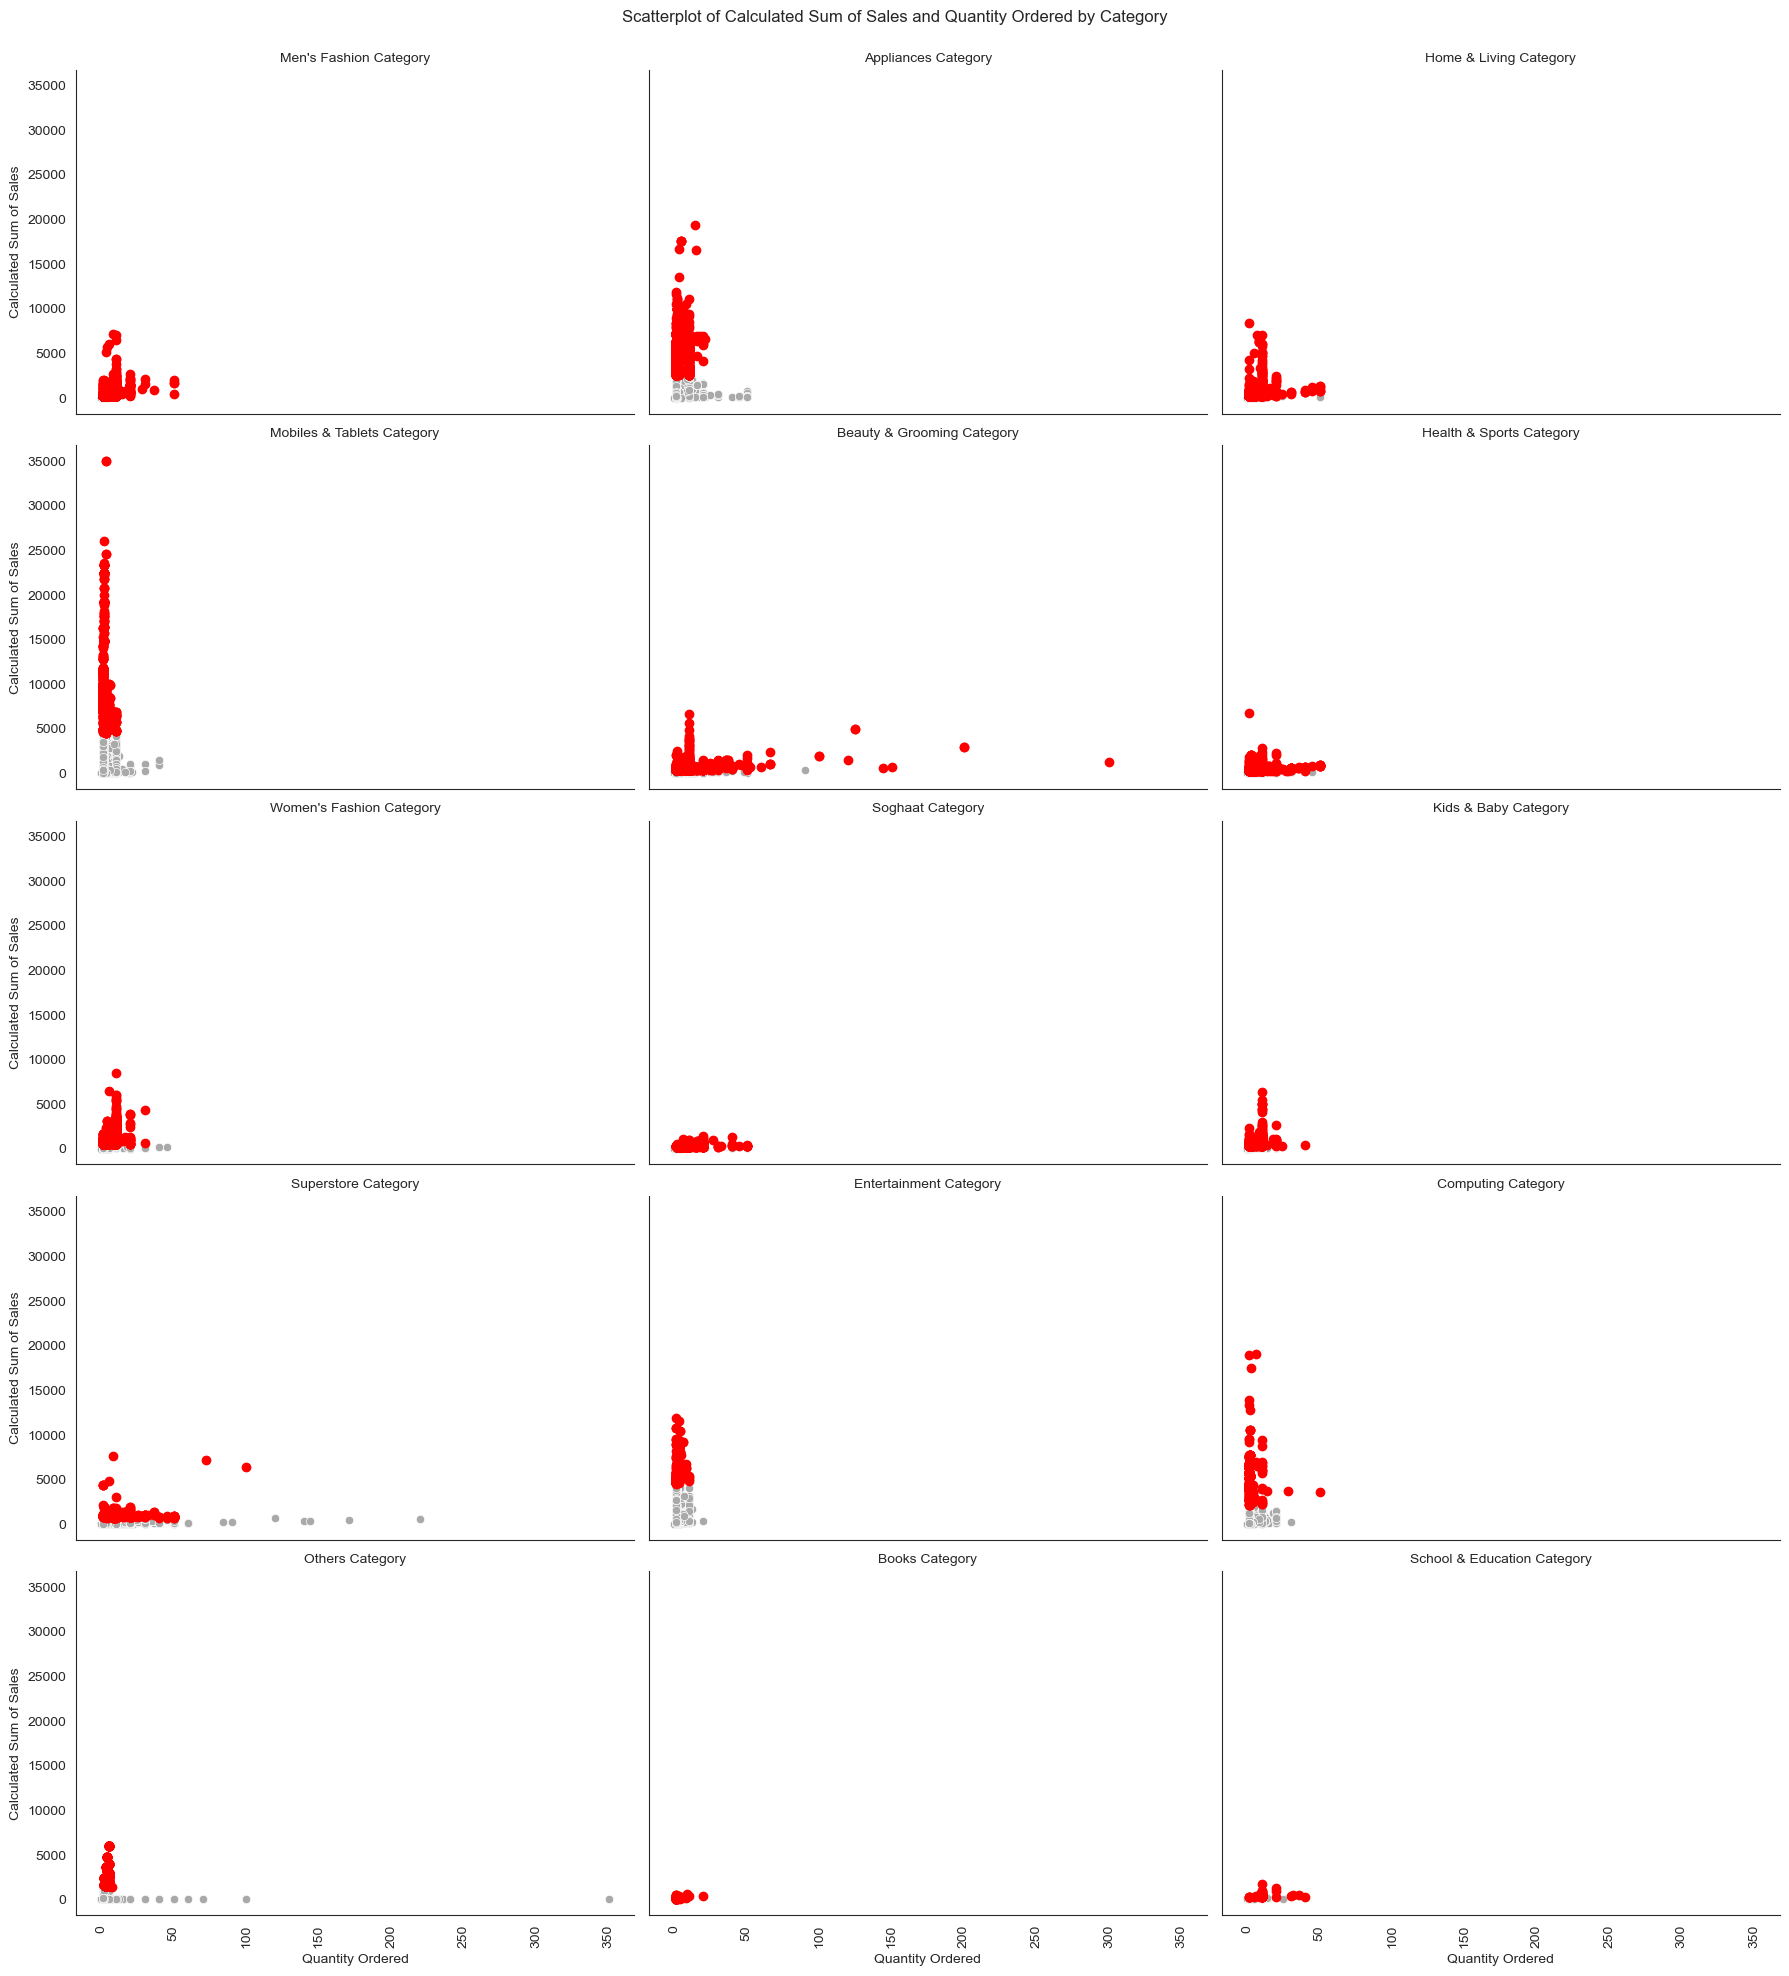

In [ ]:
# Create a FacetGrid object
g = sns.FacetGrid(df_filtered, col="category", col_wrap=3, height=4, aspect=1.5)

# Map a scatter plot to the FacetGrid
g.map_dataframe(sns.scatterplot, x='qty_ordered', y='calculated_sum_of_sales', color='darkgrey')

# Highlight the outliers in red
for ax in g.axes.flat:
    category = ax.title.get_text().split('=')[1].strip()
    IQR = outlier_info.loc[category, 'IQR']
    lower_bound = outlier_info.loc[category, 'lower_bound']
    upper_bound = outlier_info.loc[category, 'upper_bound']
    outliers = df_filtered[(df_filtered['category'] == category) & ((df_filtered['calculated_sum_of_sales'] < lower_bound) | (df_filtered['calculated_sum_of_sales'] > upper_bound))]
    ax.scatter(outliers['qty_ordered'], outliers['calculated_sum_of_sales'], color='red')

# Set the axis labels
g.set_axis_labels("Quantity Ordered", "Calculated Sum of Sales")

# Set the title for each subplot
g.set_titles(col_template="{col_name} Category")

# Rotate x-axis labels for better visibility
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Add a main title for the entire plot
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Scatterplot of Calculated Sum of Sales and Quantity Ordered by Category')

plt.show()

Subplot is not easy to view visually. Therefore, I create plots separately.
Check individual plot first.

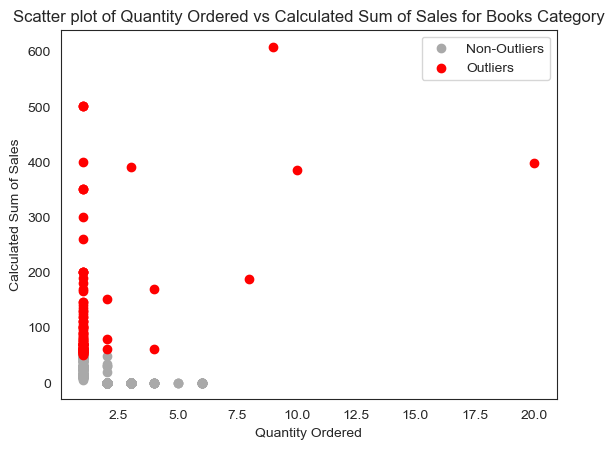

In [ ]:
# Filter for 'Books' category
df_books = df_filtered[df_filtered['category'] == 'Books']

# Calculate the IQR, lower bound, and upper bound for 'Books' category
IQR = outlier_info.loc['Books', 'IQR']
lower_bound = outlier_info.loc['Books', 'lower_bound']
upper_bound = outlier_info.loc['Books', 'upper_bound']

# Identify the outliers
outliers = df_books[(df_books['calculated_sum_of_sales'] < lower_bound) | (df_books['calculated_sum_of_sales'] > upper_bound)]
non_outliers = df_books[(df_books['calculated_sum_of_sales'] >= lower_bound) & (df_books['calculated_sum_of_sales'] <= upper_bound)]

# Plot non-outliers in dark grey and outliers in red
plt.scatter(non_outliers['qty_ordered'], non_outliers['calculated_sum_of_sales'], color='darkgrey', label='Non-Outliers')
plt.scatter(outliers['qty_ordered'], outliers['calculated_sum_of_sales'], color='red', label='Outliers')

plt.xlabel('Quantity Ordered')
plt.ylabel('Calculated Sum of Sales')
plt.title('Scatter plot of Quantity Ordered vs Calculated Sum of Sales for Books Category')

# Add a legend
plt.legend()

plt.show()

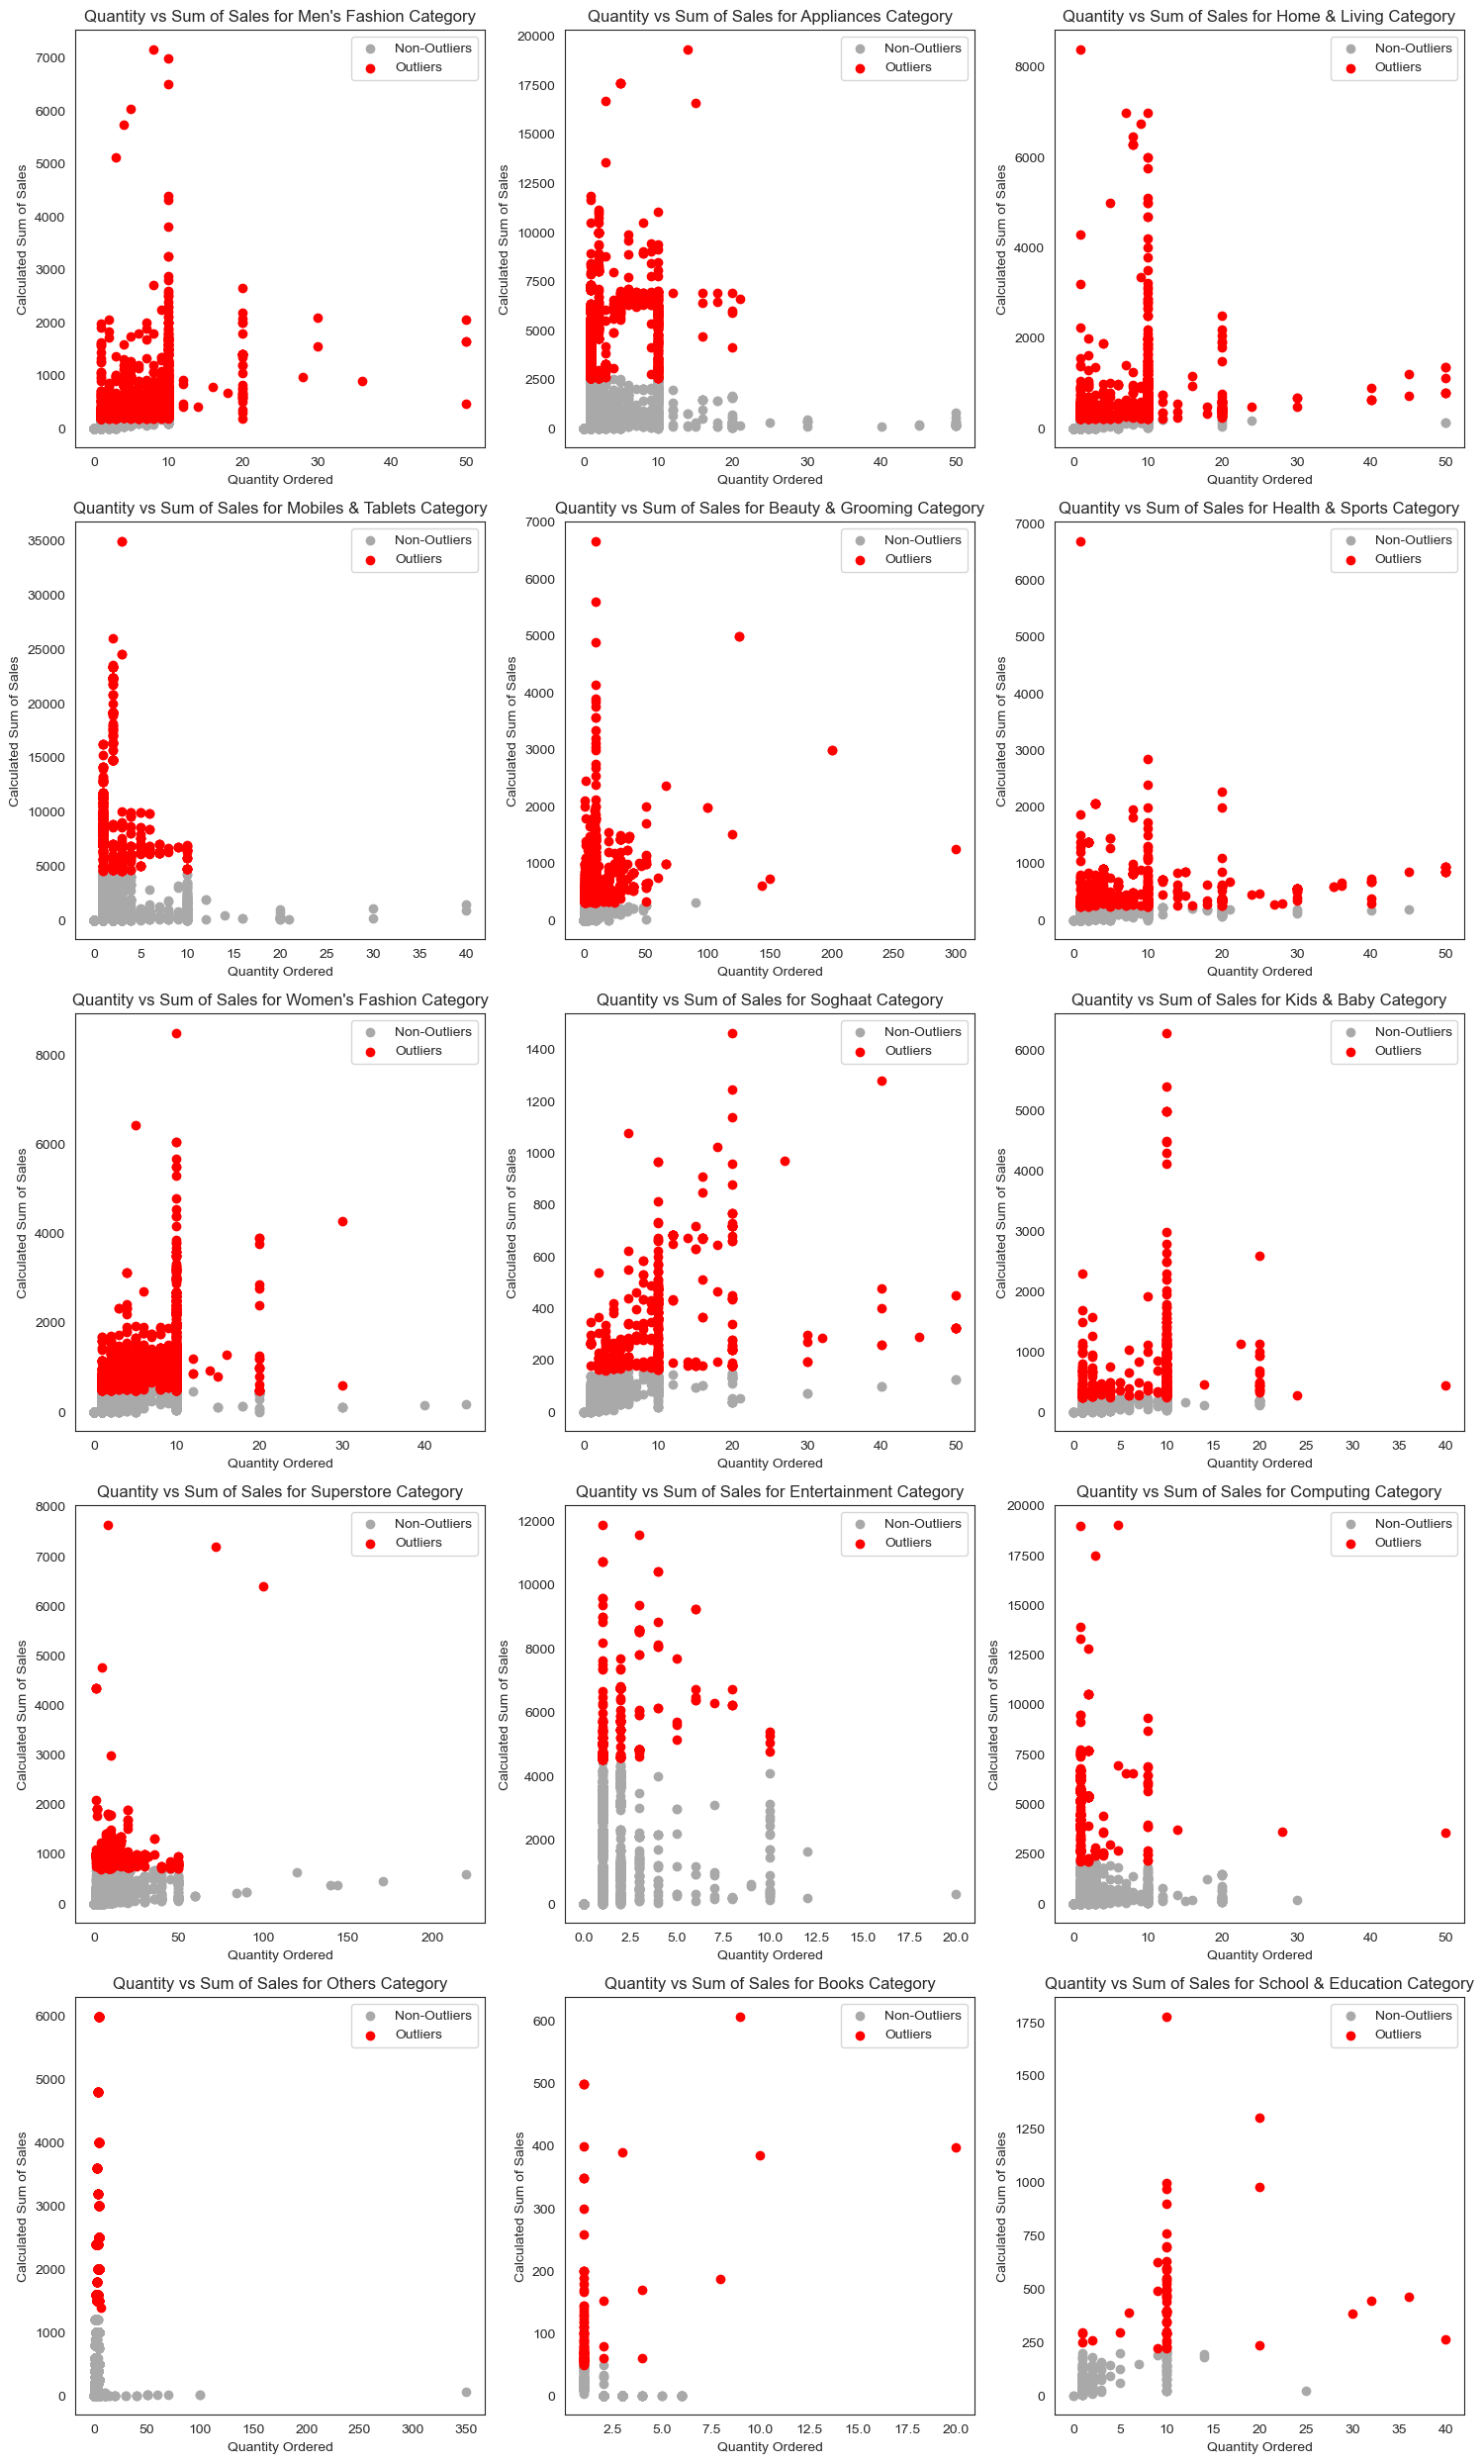

In [ ]:
# Get all unique categories
categories = df_filtered['category'].unique()

# Number of rows and columns for the subplot grid
n_rows = len(categories) // 3 + (len(categories) % 3 > 0)
n_cols = 3

# Create a figure and axes for the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))

# Flatten the axes array
axs = axs.flatten()

# Iterate over all categories
for i, category in enumerate(categories):
    # Filter for the given category
    df_category = df_filtered[df_filtered['category'] == category]

    # Calculate the IQR, lower bound, and upper bound for the given category
    IQR = outlier_info.loc[category, 'IQR']
    lower_bound = outlier_info.loc[category, 'lower_bound']
    upper_bound = outlier_info.loc[category, 'upper_bound']

    # Identify the outliers
    outliers = df_category[(df_category['calculated_sum_of_sales'] < lower_bound) | (df_category['calculated_sum_of_sales'] > upper_bound)]
    non_outliers = df_category[(df_category['calculated_sum_of_sales'] >= lower_bound) & (df_category['calculated_sum_of_sales'] <= upper_bound)]

    # Plot non-outliers in dark grey and outliers in red on the current subplot
    axs[i].scatter(non_outliers['qty_ordered'], non_outliers['calculated_sum_of_sales'], color='darkgrey', label='Non-Outliers')
    axs[i].scatter(outliers['qty_ordered'], outliers['calculated_sum_of_sales'], color='red', label='Outliers')

    axs[i].set_xlabel('Quantity Ordered')
    axs[i].set_ylabel('Calculated Sum of Sales')
    axs[i].set_title(f'Quantity vs Sum of Sales for {category} Category')

    # Add a legend
    axs[i].legend()

# Remove any unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Check scatter plot 'price' and 'Calculated Sum of Sales' for books

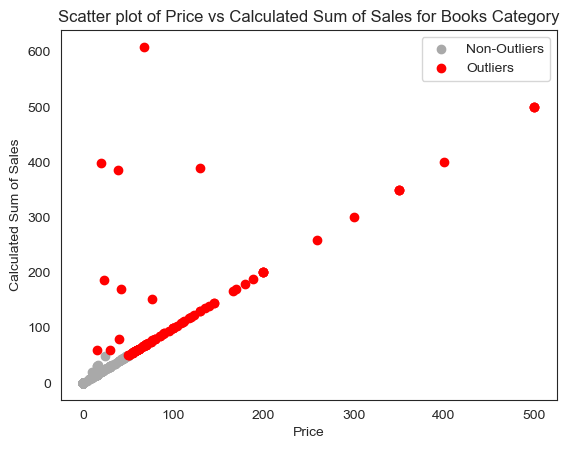

In [ ]:
# Filter for 'Books' category
df_books = df_filtered[df_filtered['category'] == 'Books']

# Calculate the IQR, lower bound, and upper bound for 'Books' category
IQR = outlier_info.loc['Books', 'IQR']
lower_bound = outlier_info.loc['Books', 'lower_bound']
upper_bound = outlier_info.loc['Books', 'upper_bound']

# Identify the outliers
outliers = df_books[(df_books['calculated_sum_of_sales'] < lower_bound) | (df_books['calculated_sum_of_sales'] > upper_bound)]
non_outliers = df_books[(df_books['calculated_sum_of_sales'] >= lower_bound) & (df_books['calculated_sum_of_sales'] <= upper_bound)]

# Plot non-outliers in dark grey and outliers in red
plt.scatter(non_outliers['price'], non_outliers['calculated_sum_of_sales'], color='darkgrey', label='Non-Outliers')
plt.scatter(outliers['price'], outliers['calculated_sum_of_sales'], color='red', label='Outliers')

plt.xlabel('Price')
plt.ylabel('Calculated Sum of Sales')
plt.title('Scatter plot of Price vs Calculated Sum of Sales for Books Category')

# Add a legend
plt.legend()

plt.show()

In [ ]:
# Get the lowest and highest price among the outliers
lowest_price = outliers['price'].min()
highest_price = outliers['price'].max()

# Get the mode of the price among the outliers
mode_price = outliers['price'].mode()[0]

print(f"The price range of the outliers in the 'Books' category is: {lowest_price} to {highest_price}")
print(f"The mode of the price among the outliers in the 'Books' category is: {mode_price}")

The price range of the outliers in the 'Books' category is: 15.0 to 500.0
The mode of the price among the outliers in the 'Books' category is: 57.9


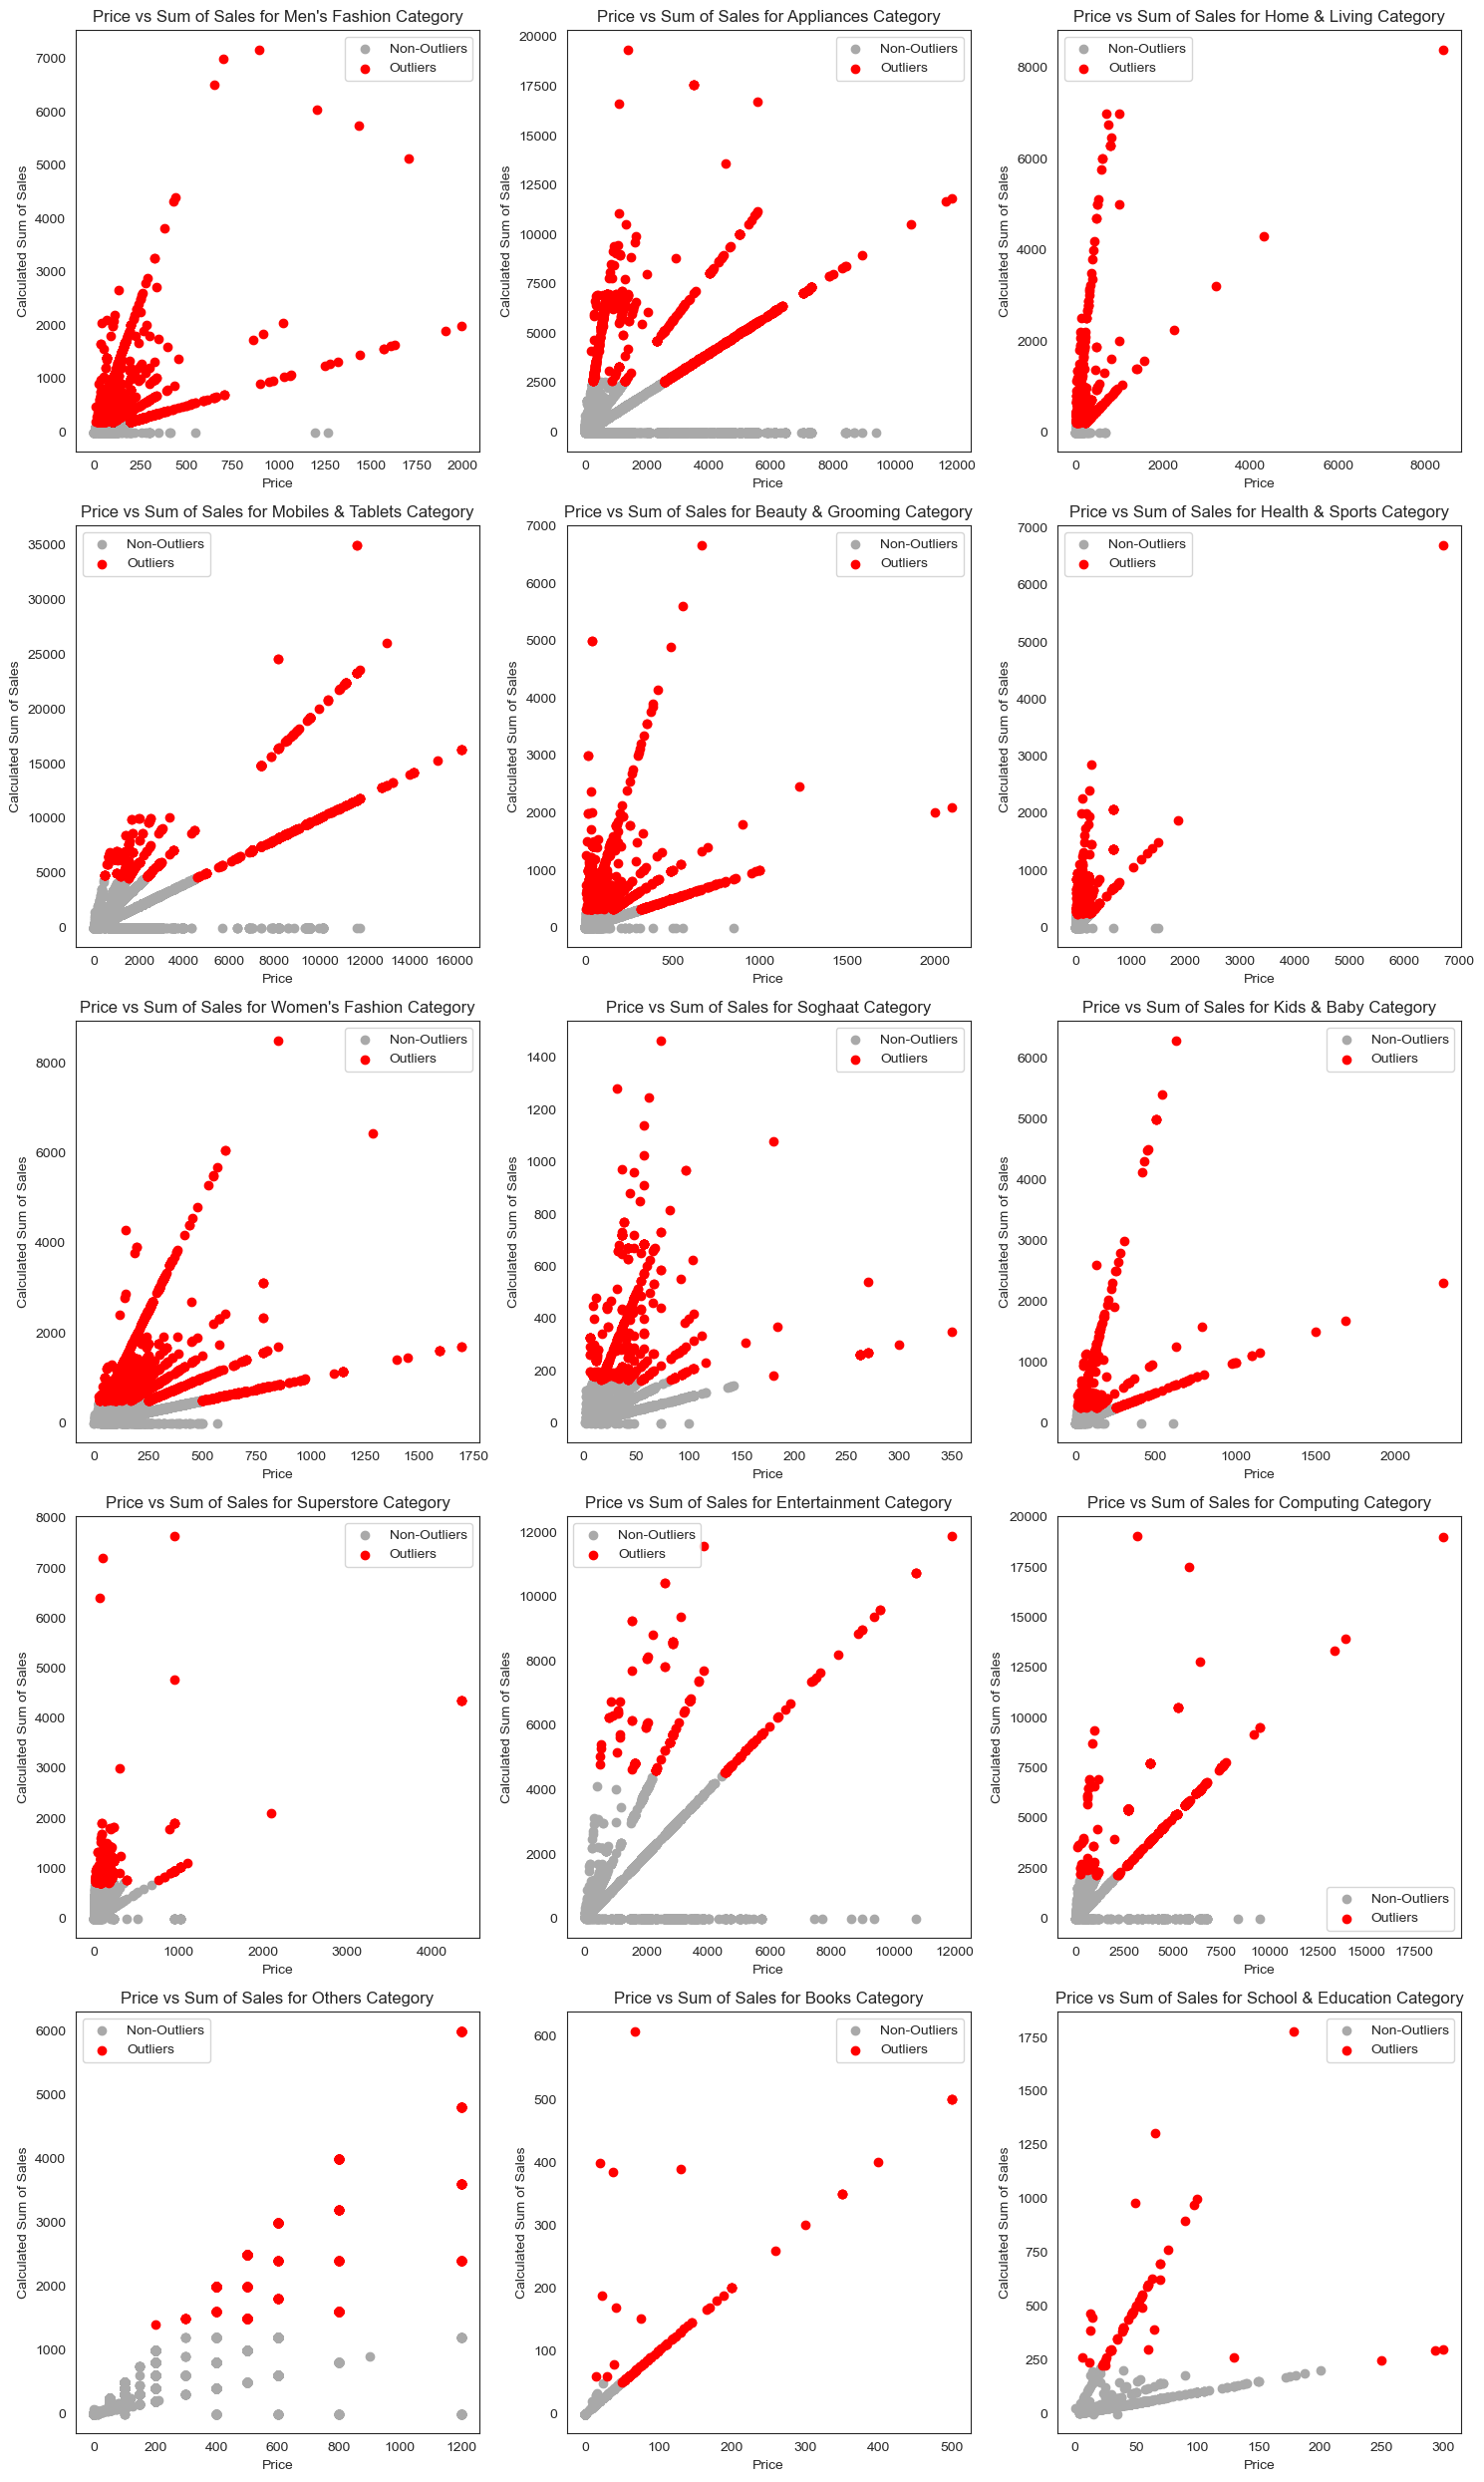

In [ ]:
# Get all unique categories
categories = df_filtered['category'].unique()

# Number of rows and columns for the subplot grid
n_rows = len(categories) // 3 + (len(categories) % 3 > 0)
n_cols = 3

# Create a figure and axes for the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))

# Flatten the axes array
axs = axs.flatten()

# Iterate over all categories
for i, category in enumerate(categories):
    # Filter for the given category
    df_category = df_filtered[df_filtered['category'] == category]

    # Calculate the IQR, lower bound, and upper bound for the given category
    IQR = outlier_info.loc[category, 'IQR']
    lower_bound = outlier_info.loc[category, 'lower_bound']
    upper_bound = outlier_info.loc[category, 'upper_bound']

    # Identify the outliers
    outliers = df_category[(df_category['calculated_sum_of_sales'] < lower_bound) | (df_category['calculated_sum_of_sales'] > upper_bound)]
    non_outliers = df_category[(df_category['calculated_sum_of_sales'] >= lower_bound) & (df_category['calculated_sum_of_sales'] <= upper_bound)]

    # Plot non-outliers in dark grey and outliers in red on the current subplot
    axs[i].scatter(non_outliers['price'], non_outliers['calculated_sum_of_sales'], color='darkgrey', label='Non-Outliers')
    axs[i].scatter(outliers['price'], outliers['calculated_sum_of_sales'], color='red', label='Outliers')

    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Calculated Sum of Sales')
    axs[i].set_title(f'Price vs Sum of Sales for {category} Category')

    # Add a legend
    axs[i].legend()

# Remove any unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
# Identify the outliers for each category
outliers = df_filtered.groupby('category').apply(lambda x: x[(x['calculated_sum_of_sales'] < outlier_info.loc[x.name, 'lower_bound']) | (x['calculated_sum_of_sales'] > outlier_info.loc[x.name, 'upper_bound'])])

# Reset the index of the outliers DataFrame
outliers = outliers.reset_index(level=0, drop=True)

# Calculate the correlation between 'price' and 'calculated_sum_of_sales' for each category's outliers
correlation = outliers.groupby('category').apply(lambda x: x[['price', 'calculated_sum_of_sales']].corr().iloc[0, 1])

# Print the correlation for each category
print(correlation)

category
Appliances            0.242799
Beauty & Grooming     0.054396
Books                 0.738264
Computing             0.596484
Entertainment         0.185011
Health & Sports       0.671404
Home & Living         0.460907
Kids & Baby           0.291765
Men's Fashion         0.328469
Mobiles & Tablets     0.621802
Others                0.682604
School & Education    0.217717
Soghaat               0.042922
Superstore            0.454239
Women's Fashion       0.044993
dtype: float64


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/648291297.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df_filtered.groupby('category').apply(lambda x: x[(x['calculated_sum_of_sales'] < outlier_info.loc[x.name, 'lower_bound']) | (x['calculated_sum_of_sales'] > outlier_info.loc[x.name, 'upper_bound'])])
/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/648291297.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the gro

We find out that price is a major factor for causing outliers in the 'calculated

## Outlier handling

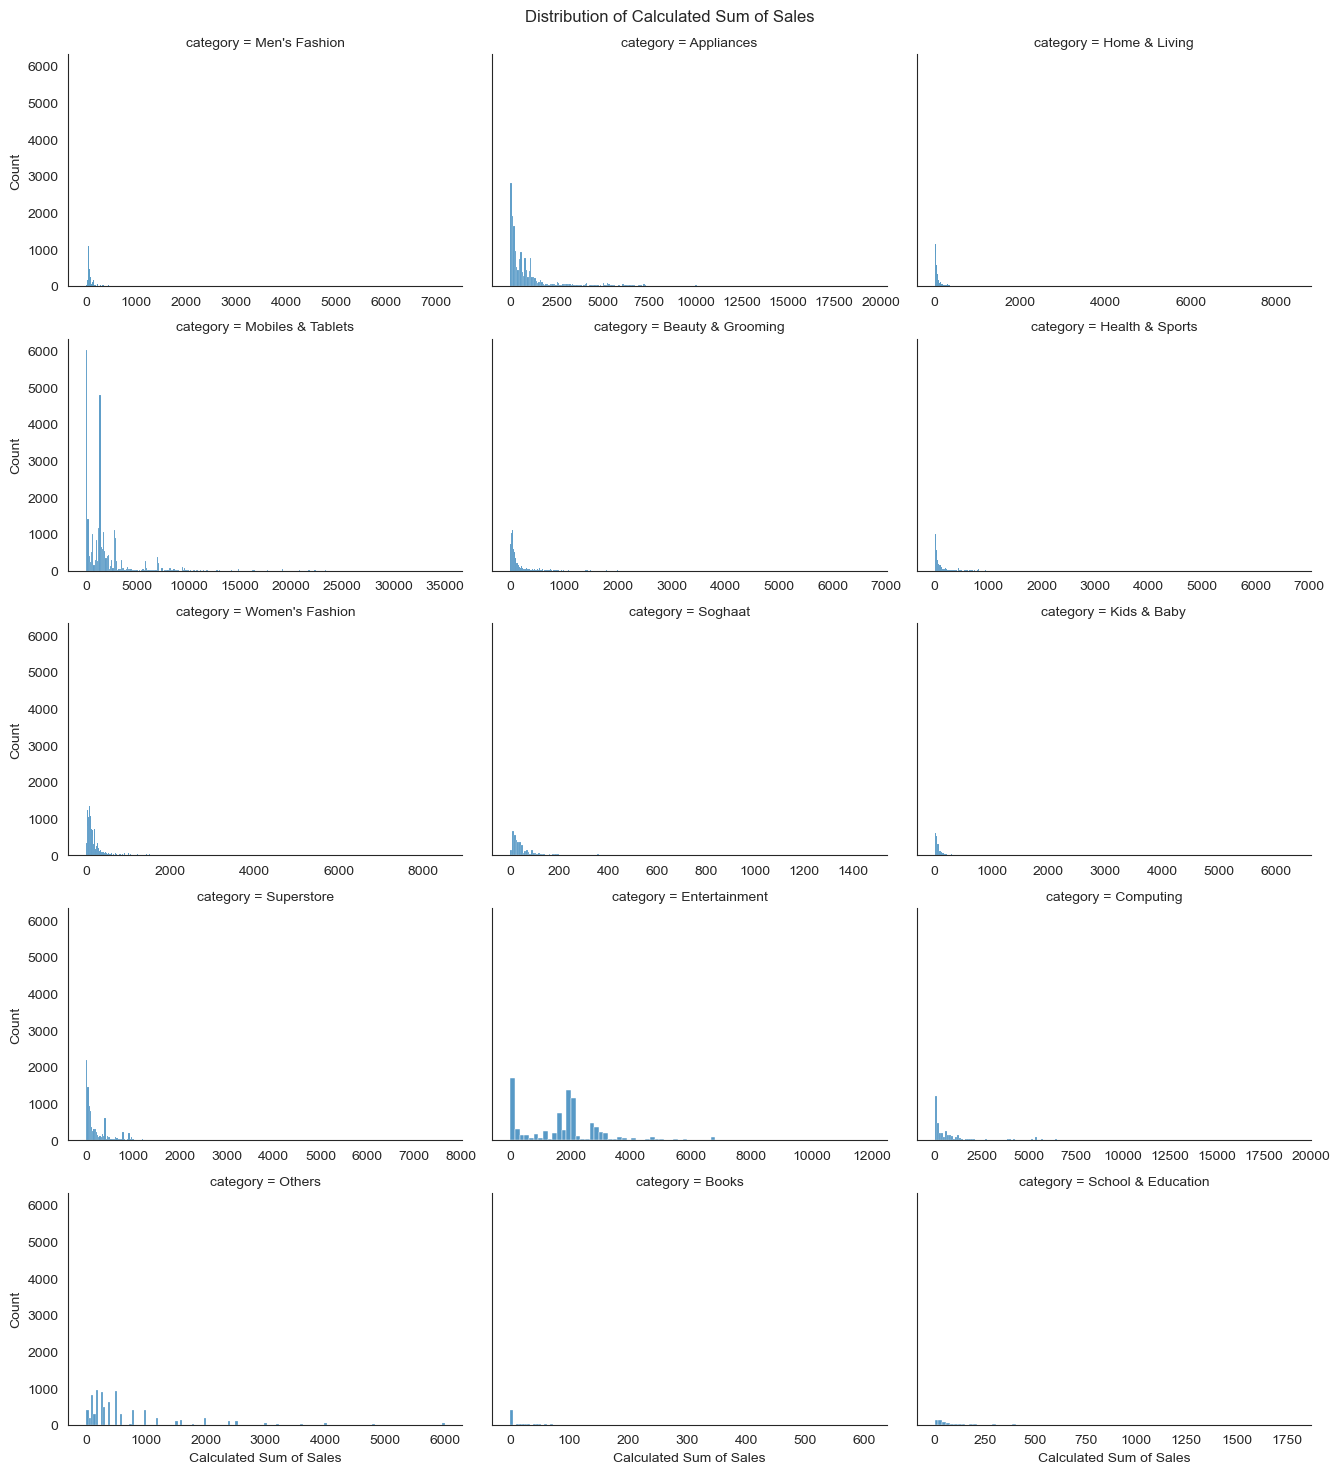

In [ ]:
# Filter df_complete for rows where status is 'Complete'
df_filtered = df_complete[df_complete['status'] == 'Complete']

# Create a FacetGrid that makes a separate subplot for each unique value of 'category'
# Set the aspect ratio to 1.5 to make the x-axis 0.5 times longer
g = sns.FacetGrid(df_filtered, col='category', col_wrap=3, sharex=False, aspect=1.5)

# Map sns.histplot to each subplot
g.map(sns.histplot, 'Calculated Sum of Sales')

# Add a main title for the entire plot
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Calculated Sum of Sales")

plt.show()

In [ ]:
# Create a new DataFrame
df_transformed = df_filtered.copy()

# Apply a logarithmic transformation to the 'Calculated Sum of Sales' column
df_transformed['Log_Calculated_Sum_of_Sales'] = np.log(df_transformed['Calculated Sum of Sales'])

# Display the new DataFrame
df_transformed.head()

/Users/pat/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,Calculated Sum of Sales,Log_Calculated_Sum_of_Sales
0,100354678,2020-12-24,Complete,574772.0,oasis_Oasis-064-36,20,89.9,1798.0,0.0,1798.0,...,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1798.0,7.494430
1,100354678,2020-12-24,Complete,574774.0,Fantastic_FT-48,10,19.0,190.0,0.0,190.0,...,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,190.0,5.247024
2,100354680,2020-10-24,Complete,574777.0,mdeal_DMC-610-8,8,149.9,1199.2,0.0,1199.2,...,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1199.2,7.089410
3,100354680,2020-10-25,Complete,574779.0,oasis_Oasis-061-36,8,79.9,639.2,0.0,639.2,...,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,639.2,6.460217
4,100367357,2020-11-07,Complete,595185.0,MEFNAR59C38B6CA08CD,1,99.9,99.9,0.0,99.9,...,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,99.9,4.604170


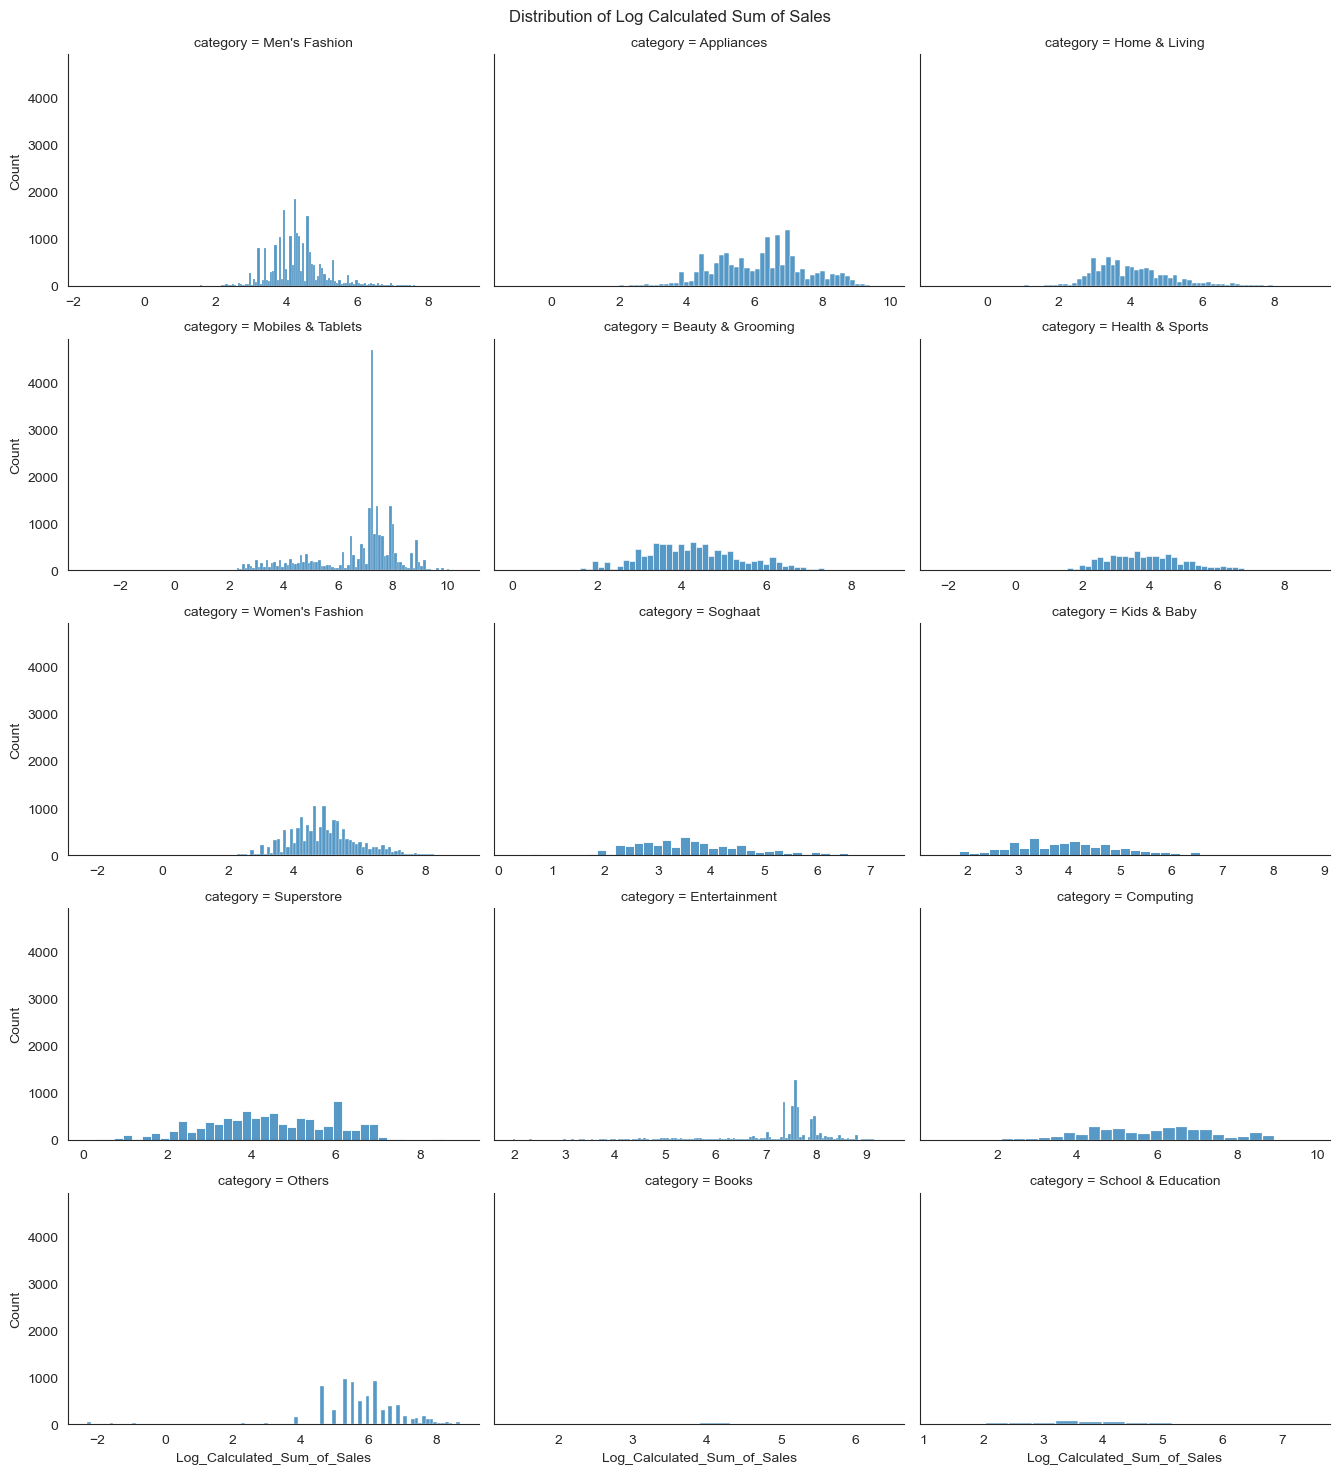

In [ ]:
# Create a FacetGrid that makes a separate subplot for each unique value of 'category'
# Set the aspect ratio to 1.5 to make the x-axis 0.5 times longer
g = sns.FacetGrid(df_transformed, col='category', col_wrap=3, sharex=False, aspect=1.5)

# Map sns.histplot to each subplot
g.map(sns.histplot, 'Log_Calculated_Sum_of_Sales')

# Add a main title for the entire plot
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Log Calculated Sum of Sales")

plt.show()

In [ ]:
# Define a function to filter outliers in a DataFrame
def filter_outliers(df):
    Q1 = df['Log_Calculated_Sum_of_Sales'].quantile(0.25)
    Q3 = df['Log_Calculated_Sum_of_Sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['Log_Calculated_Sum_of_Sales'] >= lower_bound) & (df['Log_Calculated_Sum_of_Sales'] <= upper_bound)]

# Group the DataFrame by 'category' and apply the filter_outliers function to each group
df_transformed_no_outliers = df_transformed.groupby('category').apply(filter_outliers).reset_index(drop=True)

/Users/pat/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/4285437923.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_transformed_no_outliers = df_transformed.groupby('category').apply(filter_outliers).reset_index(drop=True)


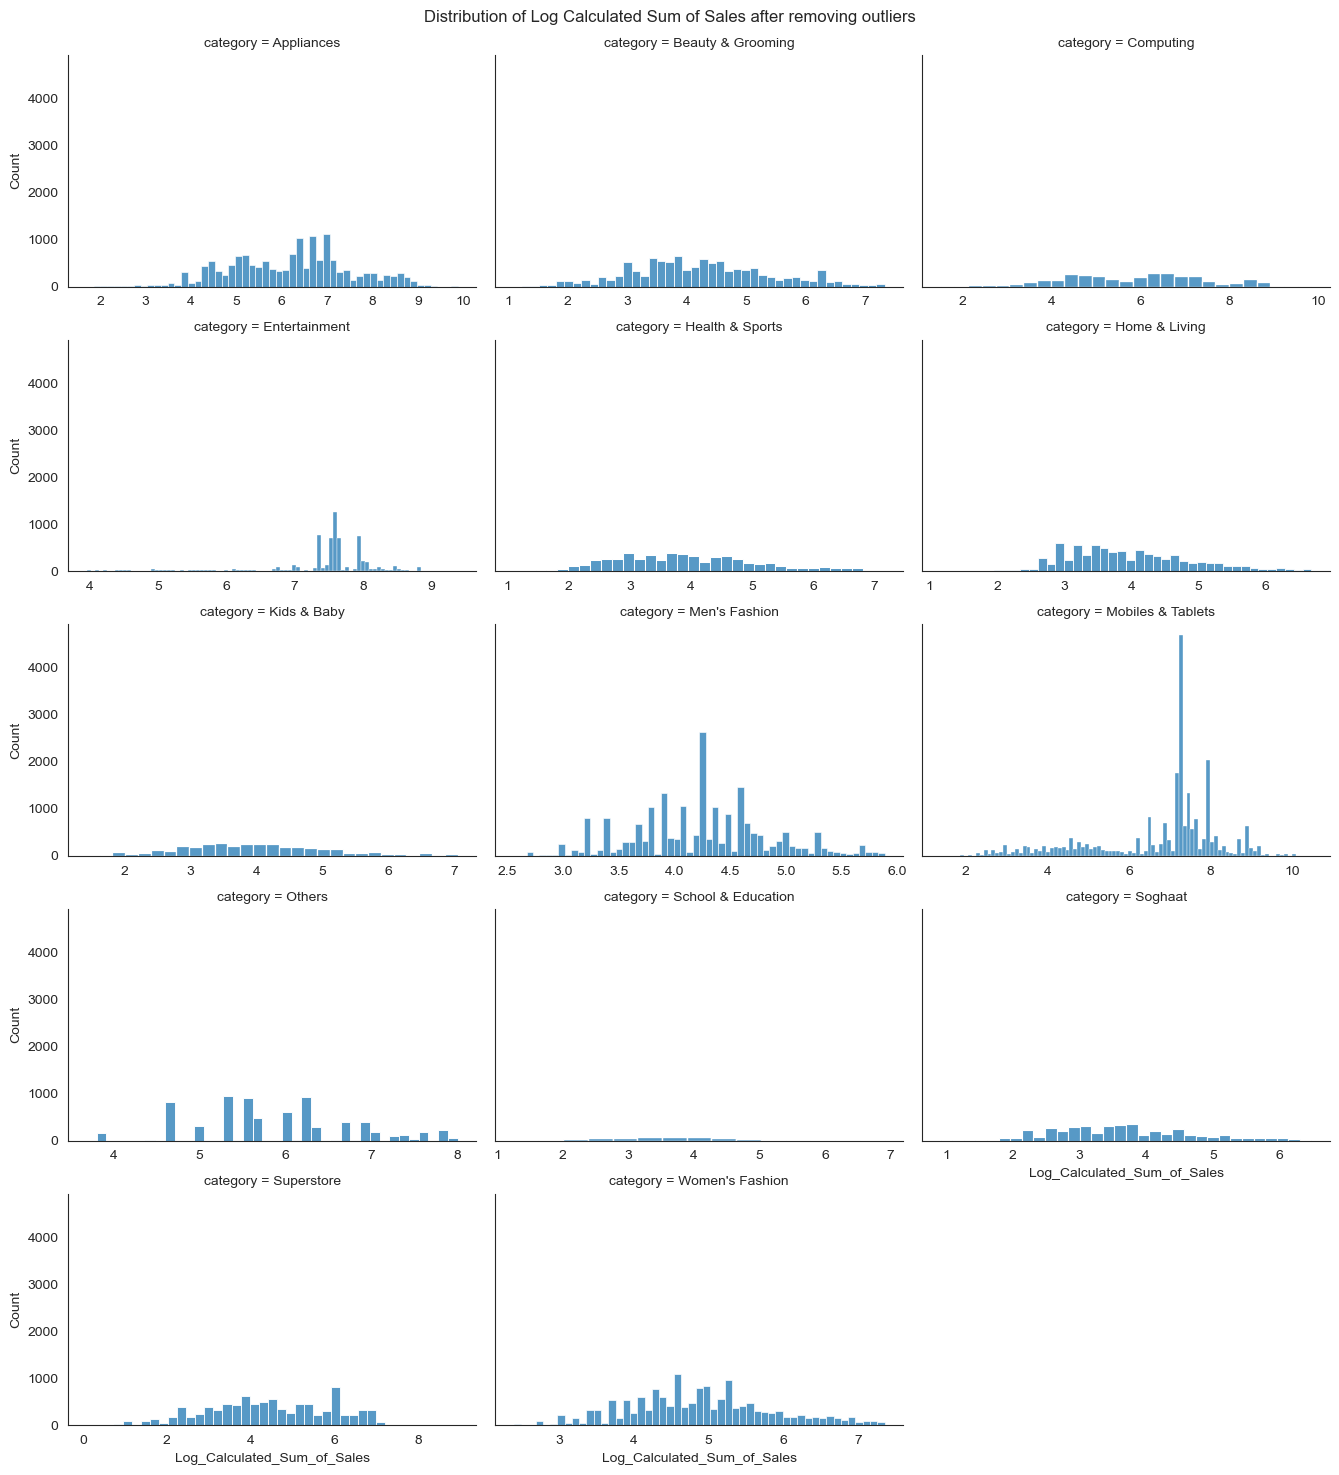

In [ ]:
# Create a FacetGrid that makes a separate subplot for each unique value of 'category'
# Set the aspect ratio to 1.5 to make the x-axis 0.5 times longer
g = sns.FacetGrid(df_transformed_no_outliers, col='category', col_wrap=3, sharex=False, aspect=1.5)

# Map sns.histplot to each subplot
g.map(sns.histplot, 'Log_Calculated_Sum_of_Sales')

# Add a main title for the entire plot
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Log Calculated Sum of Sales after removing outliers")

plt.show()

## Identify Category with high discount percentage:
Entertainment, Appliances, Computing, Mobiles & Tablet
Then we will have a more detailed analysis on PowerBI.

/Users/pat/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


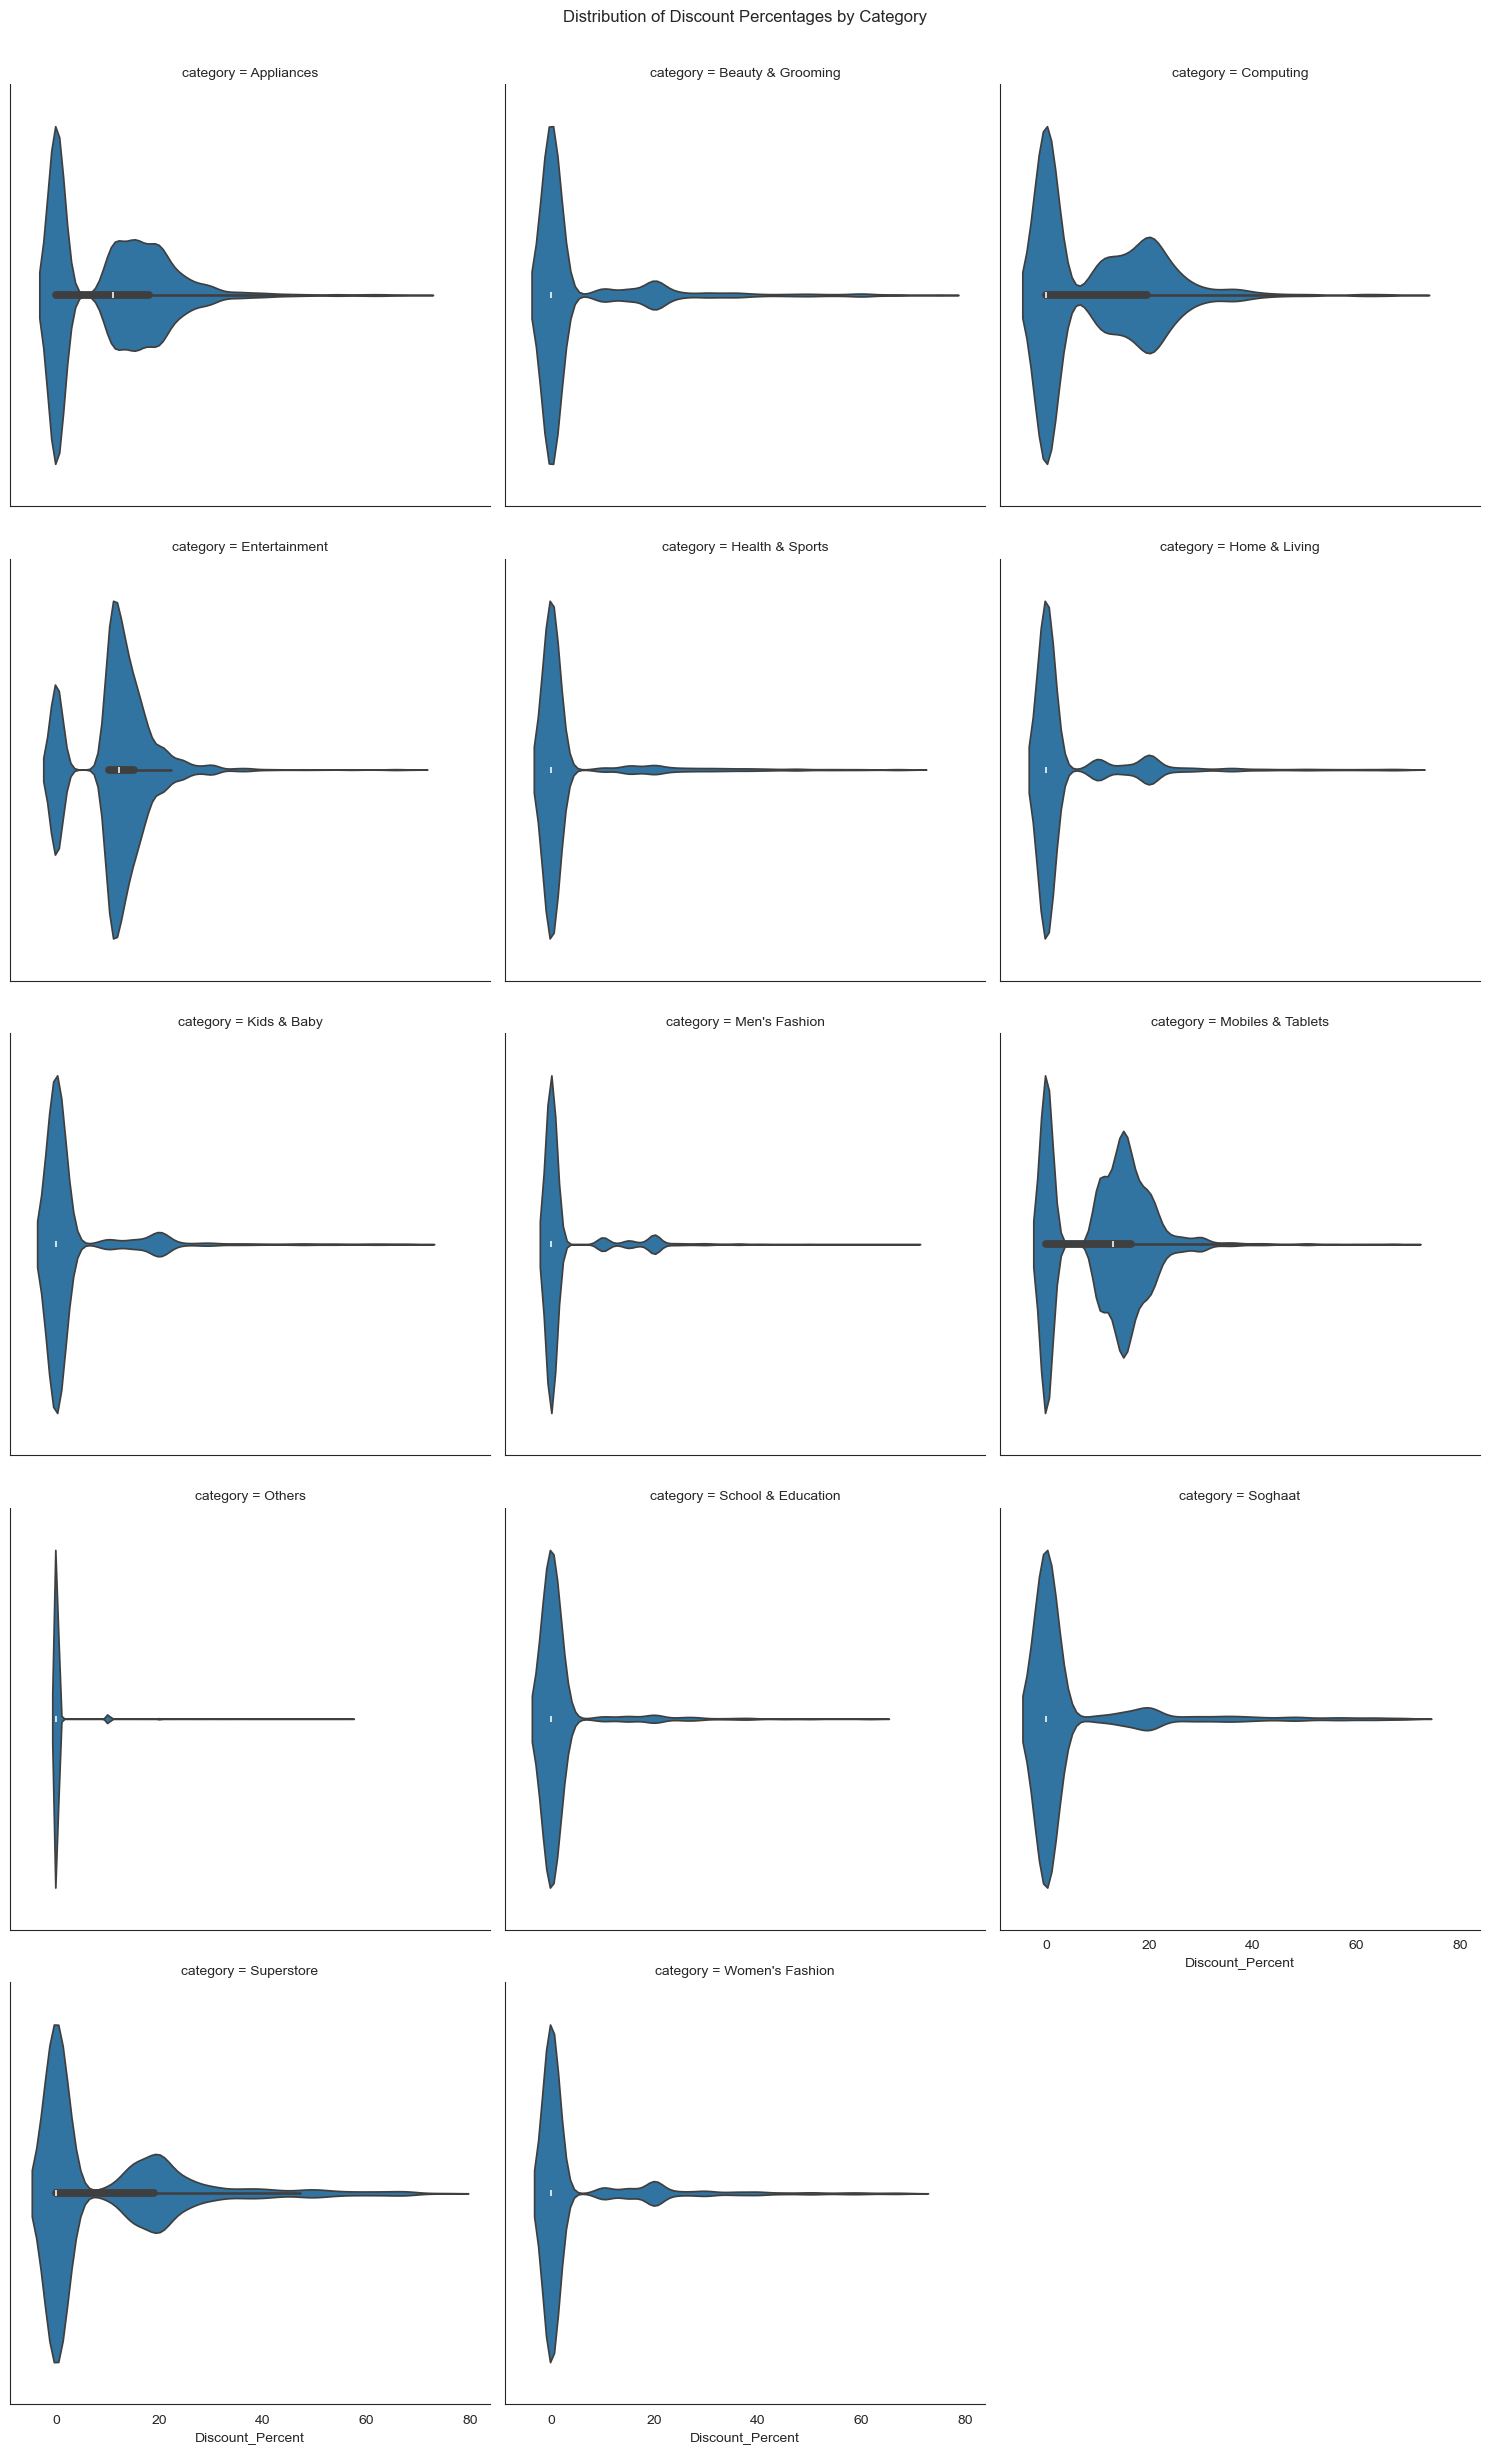

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(df_transformed_no_outliers, col="category", col_wrap=3, height=5)

# Map a violinplot onto each facet
g.map(sns.violinplot, "Discount_Percent")

# Add a main title for the entire plot
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Discount Percentages by Category")

plt.show()

## Customer Analysis

/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/2954887918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Gender', y='age', kind='boxen', data=df_transformed_no_outliers, height=6, aspect=1, palette=palette)


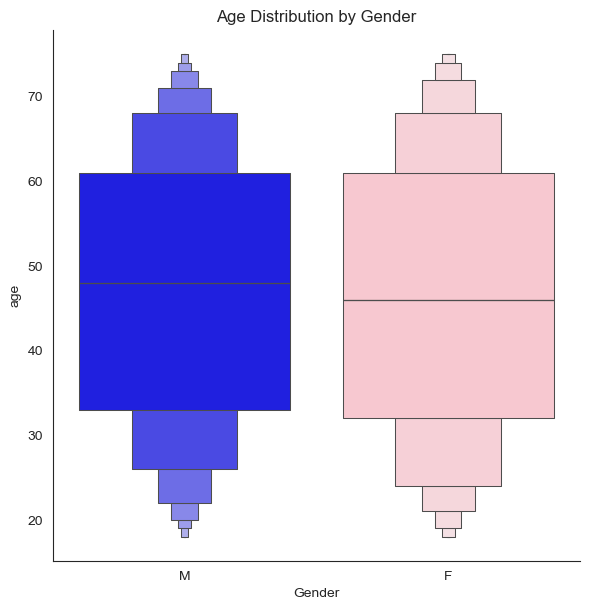

In [ ]:
# Define the color palette
palette = {'M': 'b', 'F': 'pink'}

# Create the plot
sns.catplot(x='Gender', y='age', kind='boxen', data=df_transformed_no_outliers, height=6, aspect=1, palette=palette)

# Set the title
plt.title('Age Distribution by Gender')

# Display the plot
plt.show()

In [ ]:
#print all distinct category names in data=df_transformed_no_outliers
print(df_transformed_no_outliers['category'].unique())


['Appliances' 'Beauty & Grooming' 'Computing' 'Entertainment'
 'Health & Sports' 'Home & Living' 'Kids & Baby' "Men's Fashion"
 'Mobiles & Tablets' 'Others' 'School & Education' 'Soghaat' 'Superstore'
 "Women's Fashion"]


/var/folders/nw/274vkxnx2pb530bmpgjj2ydw0000gn/T/ipykernel_13093/3285582696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Gender', y='age', col='category', kind='bar', data=df_transformed_no_outliers, col_wrap=4, height=6, aspect=1, palette=palette)


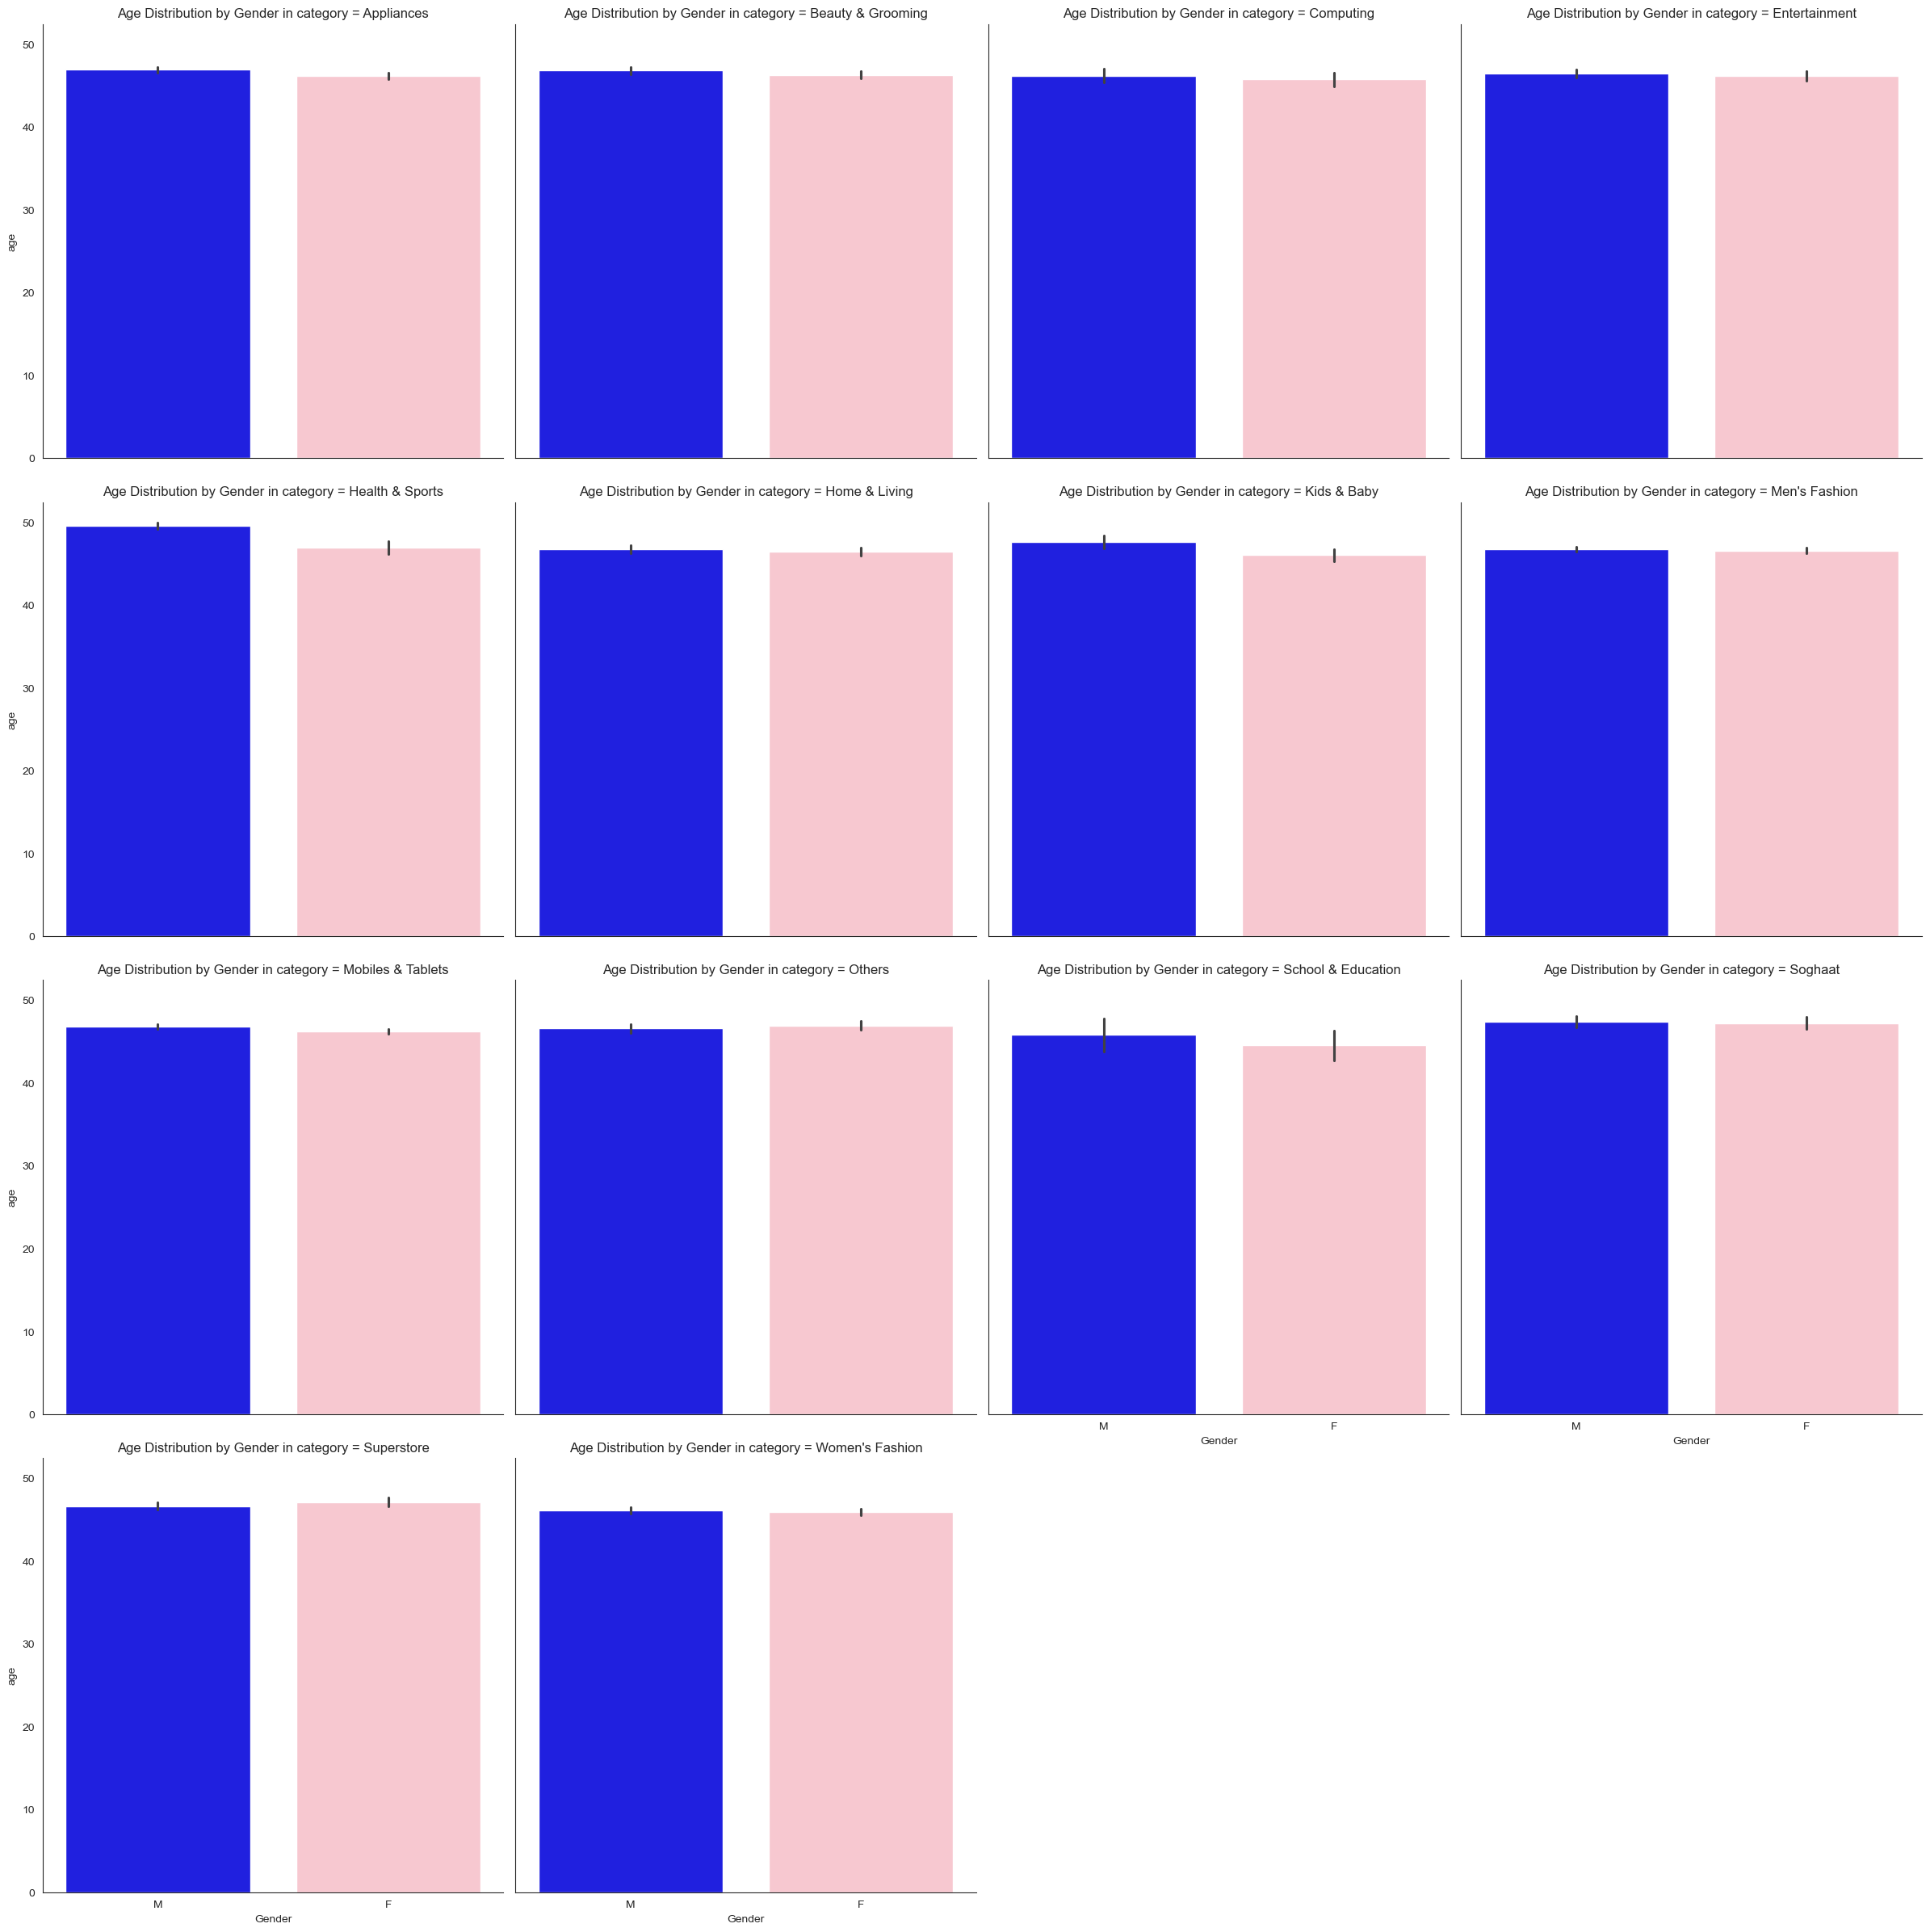

In [ ]:
# Define the color palette
palette = {'M': 'b', 'F': 'pink'}

g = sns.catplot(x='Gender', y='age', col='category', kind='bar', data=df_transformed_no_outliers, col_wrap=4, height=6, aspect=1, palette=palette)

# Add a title to each subplot
for ax in g.axes.flat:
    ax.set_title('Age Distribution by Gender in ' + ax.get_title())

plt.show()

## Verifying customer details

In [ ]:
# Concatenate the name columns with spaces for readability
df['Full Name'] = df['First Name'] + " " + df['Middle Initial'] + " " + df['Last Name']

# Group by 'SSN' and 'Full Name' and count the number of occurrences
grouped = df.groupby(['SSN', 'Full Name']).size().reset_index(name='counts')

# Identify SSNs associated with multiple distinct names
unique_ssn_multiple_names = grouped['SSN'].value_counts()
unique_ssn_multiple_names = unique_ssn_multiple_names[unique_ssn_multiple_names > 1].index

# Filter out SSNs that have more than one distinct 'Full Name'
valid_ssns = grouped[grouped['SSN'].isin(unique_ssn_multiple_names)].groupby('SSN').filter(lambda x: x['Full Name'].nunique() > 1)['SSN'].unique()

# Extract rows for SSNs with multiple distinct names and drop duplicates to ensure each full name per SSN shows once
filtered_df = df[df['SSN'].isin(valid_ssns)].drop_duplicates(subset=['SSN', 'Full Name'])

# Sort the DataFrame by SSN
filtered_df = filtered_df.sort_values(by='SSN')

if not filtered_df.empty:
    print(filtered_df[['order_id', 'Full Name', 'SSN']])
else:
    print('No wrong entry.')

         order_id          Full Name          SSN
85606   100382853      Jona Y Kaelin  004-13-6235
100330  100390441       Bee E Kepley  004-13-6235
47017   100365423      Cami V Curiel  007-11-0960
263946  100533094  Pamila L Kowalski  007-11-0960
234033  100499688  Ariel J Gallagher  012-94-0309
...           ...                ...          ...
163627  100436260  Marybelle T Crunk  761-12-6406
98144   100389321  Lionel D Pleasant  766-04-3953
88741   100384395    Dallas B Berman  766-04-3953
222153  100484214     Willy B Walton  772-02-2433
57796   100370084    Tesha E Myricks  772-02-2433

[204 rows x 3 columns]


Chapter 5: Impute the unique name

## Create derived columns for PowerBI

In [ ]:
#print column names for data=df_transformed_no_outliers
print(df_transformed_no_outliers.columns)


Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent', 'Calculated Sum of Sales',
       'Log_Calculated_Sum_of_Sales'],
      dtype='object')


In [ ]:
#rename 'qty_ordered' to 'Quantity', 'Value' to 'Original Sales Amount', 'total' to 'Sales Amount After Discount'
df3 = df_transformed_no_outliers.rename(columns={'qty_ordered': 'Quantity', 'value': 'Original Sales Amount', 'total': 'Sales Amount After Discount'})
print(df3.columns)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'Quantity',
       'price', 'Original Sales Amount', 'discount_amount',
       'Sales Amount After Discount', 'category', 'payment_method', 'bi_st',
       'cust_id', 'year', 'month', 'ref_num', 'Name Prefix', 'First Name',
       'Middle Initial', 'Last Name', 'Gender', 'age', 'full_name', 'E Mail',
       'Customer Since', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Discount_Percent',
       'Calculated Sum of Sales', 'Log_Calculated_Sum_of_Sales'],
      dtype='object')


In [ ]:
#combine 'city' and 'state'
df3['City_State'] = df3['City'] + ', ' + df3['State']
print(df3.head())


    order_id order_date    status   item_id                  sku  Quantity  \
0  100403536 2020-12-20  Complete  657777.0  APPWES59CA4D59CB41A         2   
1  100403536 2020-12-20  Complete  657778.0  APPPHI5A09939191938         2   
2  100359410 2020-12-23  Complete  583004.0  APPANE59BD020E370CC        10   
3  100359558 2020-12-24  Complete  583239.0  APPLIO59BA25191179A        10   
4  100362846 2020-11-28  Complete  588314.0  APPHED59D47BB72D66F         1   

   price  Original Sales Amount  discount_amount  Sales Amount After Discount  \
0  254.8                  509.6           101.92                       407.68   
1  315.5                  631.0           126.20                       504.80   
2  199.0                 1990.0             0.00                      1990.00   
3  199.9                 1999.0             0.00                      1999.00   
4   54.9                   54.9             0.00                        54.90   

   ...       County         City State    Zi

In [ ]:
#print df3 head with month only
print(df3['month'].head())


0    Dec-2020
1    Dec-2020
2    Oct-2020
3    Oct-2020
4    Nov-2020
Name: month, dtype: object


In [ ]:
# remove the '-YYYY' in ['month']
df3['month'] = df3['month'].apply(lambda x: re.sub('-\d{4}', '', x))
print(df3['month'].head())

0    Dec
1    Dec
2    Oct
3    Oct
4    Nov
Name: month, dtype: object


In [ ]:
#checking
df_2021 = df3[df3['year'] == 2021]
print(df_2021['month'].head())

5     Jul
6     May
9     Jun
10    Jun
39    Jan
Name: month, dtype: object


In [ ]:
# create Payment_ID
# Generate a payment ID with a prefix and a sequential number based on the 'User Name'
def generate_payment_id_based_on_user_name(user_name, index):

    # Use the row's index for the sequential part, ensuring uniqueness
    return f'PAY-{user_name[:3].upper()}-{index + 1}'

# Use the 'User Name' and the row index to generate shipment IDs
df3['Payment ID'] = df3.apply(lambda x: generate_payment_id_based_on_user_name(x['User Name'], x.name), axis=1)

# Display the first few Payment IDs to confirm the format is based on 'User Name'
print(df3['Payment ID'].head())

0    PAY-LSE-1
1    PAY-LSE-2
2    PAY-JGS-3
3    PAY-JGS-4
4    PAY-LZM-5
Name: Payment ID, dtype: object


Grouping for 'payment method'
| Category                               | Payment Method       |
|----------------------------------------|----------------------|
| **Direct Payment**                     | COD                  |
|                                        | Cash at Doorstep     |
| **Bank Payments**                      | Bank Alfalah         |
|                                        | MCB Lite             |
| **Electronic Wallets**                 | Jazz Wallet          |
|                                        | MCB Lite             |
| **Online Payment Gateways**            | Payaxis              |
|                                        | Easypay              |
|                                        | APG                  |
| **Voucher/Coupon Payments**            | Jazz Voucher         |
|                                        | Easypay Voucher      |
| **Special or Customized Payment Solutions** | Easypay_MA        |
|                                        | Customer Credit      |
|                                        | Finance Settlement    |


In [ ]:
#group 'payment_method' to 'payment_group'
# Create a dictionary that maps each payment method to its group
payment_method_groups = {
    'cod': 'Direct Payment',
    'cashatdoorstep': 'Direct Payment',
    'bankalfalah': 'Bank Payments',
    'mcblite': 'Electronic Wallets',
    'jazzwallet': 'Electronic Wallets',
    'Payaxis': 'Online Payment Gateways',
    'Easypay': 'Online Payment Gateways',
    'apg': 'Online Payment Gateways',
    'jazzvoucher': 'Voucher',
    'easypay_voucher': 'Voucher',
    'Easypay_MA': 'Special',
    'customercredit': 'Special',
    'financesettlement': 'Special'
}

# Create a new column 'payment_group' that shows the group of each payment method
df3['payment_group'] = df3['payment_method'].map(payment_method_groups)

# Print the first few rows of the DataFrame to check the new column. Show only ['payment_group'] and ['payment_method']
print(df3[['payment_group', 'payment_method']].head(10))


             payment_group payment_method
0  Online Payment Gateways        Easypay
1  Online Payment Gateways        Easypay
2           Direct Payment            cod
3           Direct Payment            cod
4                  Special     Easypay_MA
5                  Special     Easypay_MA
6           Direct Payment            cod
7           Direct Payment            cod
8  Online Payment Gateways        Payaxis
9                  Voucher    jazzvoucher


In [ ]:
#create a new column called day_type and group date to 'weekday' and 'weekend'
# If 'order_date' is not a datetime object, you first need to convert it:
df3['order_date'] = pd.to_datetime(df3['order_date'])

# Function to determine whether a date is a 'weekday' or 'weekend'
def categorize_day(date):
    if date.weekday() < 5:  # weekday() returns 0 for Monday through 4 for Friday
        return 'Weekday'
    else:
        return 'Weekend'

# Apply the function to the 'order_date' column
df3['day_type'] = df3['order_date'].apply(categorize_day)

# Display the first few rows of the DataFrame to verify the new column
print(df3[['day_type', 'order_date']].head(10))


  day_type order_date
0  Weekend 2020-12-20
1  Weekend 2020-12-20
2  Weekday 2020-12-23
3  Weekday 2020-12-24
4  Weekend 2020-11-28
5  Weekday 2021-04-09
6  Weekday 2020-12-21
7  Weekday 2020-11-06
8  Weekday 2020-11-16
9  Weekday 2021-09-15


In [ ]:
#checking
print(df3.columns)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'Quantity',
       'price', 'Original Sales Amount', 'discount_amount',
       'Sales Amount After Discount', 'category', 'payment_method', 'bi_st',
       'cust_id', 'year', 'month', 'ref_num', 'Name Prefix', 'First Name',
       'Middle Initial', 'Last Name', 'Gender', 'age', 'full_name', 'E Mail',
       'Customer Since', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Discount_Percent',
       'Calculated Sum of Sales', 'Log_Calculated_Sum_of_Sales', 'City_State',
       'Payment ID', 'payment_group', 'day_type'],
      dtype='object')


In [ ]:
#checking
print(df3.head())

    order_id order_date    status   item_id                  sku  Quantity  \
0  100403536 2020-12-20  Complete  657777.0  APPWES59CA4D59CB41A         2   
1  100403536 2020-12-20  Complete  657778.0  APPPHI5A09939191938         2   
2  100359410 2020-12-23  Complete  583004.0  APPANE59BD020E370CC        10   
3  100359558 2020-12-24  Complete  583239.0  APPLIO59BA25191179A        10   
4  100362846 2020-11-28  Complete  588314.0  APPHED59D47BB72D66F         1   

   price  Original Sales Amount  discount_amount  Sales Amount After Discount  \
0  254.8                  509.6           101.92                       407.68   
1  315.5                  631.0           126.20                       504.80   
2  199.0                 1990.0             0.00                      1990.00   
3  199.9                 1999.0             0.00                      1999.00   
4   54.9                   54.9             0.00                        54.90   

   ...    Zip   Region   User Name  Discount

In [ ]:
# List of columns to drop
columns_to_drop = ['discount_amount', 'Middle Initial', 'Full Name', 'SSN', 'Phone No.', 'Place Name', 'ref_num', 'bi_st']

# Check if the columns exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df3.columns]

# Drop the columns
df4 = df3.drop(columns_to_drop, axis=1)

# Print the columns of the new DataFrame
print(df4.columns)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'Quantity',
       'price', 'Original Sales Amount', 'Sales Amount After Discount',
       'category', 'payment_method', 'cust_id', 'year', 'month', 'Name Prefix',
       'First Name', 'Last Name', 'Gender', 'age', 'full_name', 'E Mail',
       'Customer Since', 'Phone No. ', 'County', 'City', 'State', 'Zip',
       'Region', 'User Name', 'Discount_Percent', 'Calculated Sum of Sales',
       'Log_Calculated_Sum_of_Sales', 'City_State', 'Payment ID',
       'payment_group', 'day_type'],
      dtype='object')


In [ ]:
#export the df4 to excel
#save it to /Users/pat/Desktop/Business Analytics/MIS587 BI/Project/Working/exported
df4.to_excel('/Users/pat/Desktop/Business Analytics/MIS587 BI/Project/Working/exported/sales_cleaned4.xlsx', index=False)


